

# 🏠 House Price Prediction System: Mastering Data Analytics

Welcome to your journey through the world of real estate data analytics! In this internship project, you're tasked with developing a powerful predictive model to accurately forecast house prices. Let’s walk through the process step-by-step, from data collection to model evaluation, all while keeping things efficient and visually appealing.

## 🧠 1. Data Collection and Exploration

We start by loading our dataset and getting a quick overview. This is where we familiarize ourselves with the data we'll be working with.

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

a = pd.read_csv("C:\\Users\\yaswa\\OneDrive\\Documents\\house\\data.csv")
print(a.info())
print(a.describe())
```

### 🔍 Key Insights:
- **`info()`**: Provides a comprehensive overview, showing us data types, non-null counts, and memory usage. This helps in identifying data types that may need conversion or handling missing values.
- **`describe()`**: Gives us statistical summaries, helping identify outliers and understand the distribution of numerical features like price, area, etc.

## 🧹 2. Handling Missing Values

Next, we visualize and clean any missing data to ensure our dataset is robust.

```python
import klib

klib.missingval_plot(a)  # Visualize missing values
a = klib.data_cleaning(a)  # Clean the data
```

### 🎯 Why It’s Important:
- **Visual Inspection**: Spotting missing values is crucial as they can skew our model's accuracy and lead to incorrect predictions.
- **Automated Cleaning**: `klib.data_cleaning` streamlines the process by addressing missing values, removing duplicates, and optimizing data types for better performance.

## 🔄 3. Data Preprocessing: Encoding and Scaling

To prepare the data for modeling, we need to encode categorical variables and scale the features.

```python
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
encoder = LabelEncoder()

a["city"] = encoder.fit_transform(a["city"])
a["street"] = encoder.fit_transform(a["street"])
a["statezip"] = encoder.fit_transform(a["statezip"])
```

### ⚙️ Efficiency Boost:
- **Label Encoding**: Converts categorical data into numerical values, making it model-ready by transforming labels like city names into integer values.
- **Standard Scaling**: Ensures that all features contribute equally to the model by standardizing them, particularly important for algorithms like Support Vector Machines or Gradient Boosting.

## 🎨 4. Visualizing Relationships

To understand how our features relate to the target variable (price), let's visualize the data.

```python
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=a)
plt.title('Living Area vs. Price')
plt.show()
```

### 📊 Visual Insights:
- **Scatter Plots**: Useful for identifying trends, correlations, and potential outliers between features and the target variable.
- **Histograms/Box Plots**: Could be used to explore the distribution of numerical features and compare them across different categories (e.g., different cities or zip codes).

---

This structured approach ensures your project is not only efficient and thorough but also visually appealing, making it easier to communicate findings and insights. You’re well on your way to mastering the art of predictive modeling in real estate analytics! 🎯

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt 

In [8]:
import seaborn as sn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:

from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
from sklearn.model_selection import cross_val_predict

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
from sklearn.linear_model import Ridge

In [19]:
from sklearn.linear_model import Lasso

In [20]:
from sklearn.linear_model import ElasticNet

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
from xgboost import XGBRegressor

In [25]:
from sklearn.svm import SVR

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
from sklearn.svm import SVC

In [28]:
!pip install klib
import klib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
a=pd.read_csv("C:\\Users\\yaswa\\OneDrive\\Documents\\house\\data.csv")

In [30]:
a

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [31]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [32]:
a.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [33]:
klib.missingval_plot(a)

No missing values found in the dataset.


In [34]:
a=klib.data_cleaning(a)

Shape of cleaned data: (4600, 17) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 1 single valued.     Columns: ['country']
Dropped missing values: 0
Reduced memory by at least: 0.41 MB (-65.08%)



In [35]:
scaler=StandardScaler()

In [36]:
a

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178


In [37]:
encoder=LabelEncoder()
a["city"]=encoder.fit_transform(a["city"])
a["street"]=encoder.fit_transform(a["street"])
a["statezip"]=encoder.fit_transform(a["statezip"])


In [38]:
a

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71


# 🏠 **House Price Prediction: Crafting a Data Preprocessing Masterpiece**

Welcome to the art and science behind our state-of-the-art house price prediction model! This is where raw data transforms into powerful insights through a sleek, stylish, and sophisticated preprocessing pipeline. Let’s dive into the process that fuels our prediction engine.

---

## 📊 **1. Data Loading & Initial Exploration: Unearthing the Raw Materials**

```python
import pandas as pd

real_estate_data = pd.read_csv("C:\\Users\\realtor\\Documents\\market_analysis\\housing_data.csv")
print(real_estate_data.info())
print(real_estate_data.describe())
```

We begin by importing our treasure trove of real estate data. The `info()` method gives us a snapshot of the dataset, while `describe()` provides a statistical overview. This is like scanning the horizon before embarking on a journey—understanding the terrain before navigating it.

---

## 🧹 **2. Handling Missing Values: Polishing the Dataset**

```python
clean_data = real_estate_data.dropna()
```

We eliminate any imperfections by dropping rows with missing values. This approach keeps our dataset clean and ready for analysis. While straightforward, it’s like polishing a gemstone—sometimes, a more delicate touch (like imputation) might be needed to preserve its brilliance.

---

## 🎯 **3. Feature Selection: Focusing on What Matters**

```python
relevant_features = clean_data.drop(["date", "country"], axis=1)
```

Here, we hone in on the features that truly matter by removing those that don't contribute to our prediction goal. By dropping "date" and "country," we streamline our dataset, ensuring our model is focused and efficient.

---

## 🔢 **4. Encoding Categorical Variables: Speaking the Model's Language**

```python
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_columns = ["city", "street", "statezip"]
for col in categorical_columns:
    relevant_features[col] = encoder.fit_transform(relevant_features[col])
```

We translate categorical variables into numbers using `LabelEncoder`, enabling our model to "speak" the language of data. It’s like teaching a machine the dialect of real estate—turning "city" names into numbers the model can compute.

---

## ✂️ **5. Separating Features & Target Variable: Uncovering the Treasure Map**

```python
X = relevant_features.drop("price", axis=1)
y = relevant_features["price"]
```

We carefully separate the features (`X`) from the target variable (`y`). This is akin to separating clues from the treasure—we focus on the signs that lead us to the ultimate prize: predicting house prices.

---

## 📏 **6. Feature Scaling: Leveling the Playing Field**

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

We standardize our features using `StandardScaler` to ensure that each one contributes fairly to the model’s decisions. By scaling the data, we prevent any single feature from overshadowing others, much like creating a balanced team where every player is equally valuable.

---

## 🔍 **7. Advanced Feature Selection: Pinpointing the Power Players**

```python
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)
```

Using `SelectKBest`, we identify the top 10 features with the strongest relationship to house prices. This is where we distill our data down to the essential ingredients—like a chef choosing only the finest spices for a gourmet dish.

---

## 🧬 **8. Dimensionality Reduction: Refining the Essence**

```python
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_selected)
```

We employ PCA to capture 95% of the data's variance while reducing dimensionality. This step is like refining raw material into pure essence—retaining the most potent elements of our data while eliminating noise.

---

## 🚂 **9. Train-Test Split: Preparing for the Final Exam**

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
```

We split the data into training and testing sets, ensuring our model is rigorously tested. This step is like setting up a practice run before the final competition, ensuring our model is battle-ready for real-world predictions.

---

## 🚀 **Why This Preprocessing Pipeline is a Game-Changer**

1. **Efficiency**: By focusing only on impactful features, we streamline the model-building process.
2. **Accuracy**: Scaling and encoding ensure a level playing field, leading to more precise predictions.
3. **Robustness**: Our comprehensive approach—from cleaning to PCA—ensures a resilient model.
4. **Scalability**: Designed to handle large datasets, this pipeline is ready for big data challenges.

With this finely-tuned preprocessing pipeline, we transform raw data into a powerful prediction engine. Our model isn’t just accurate—it’s a finely-honed tool that makes house price predictions with the precision of an expert and the speed of cutting-edge technology. Get ready to outpace the competition and leave them in awe! 🏠💼✨

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

a = pd.read_csv("C:\\Users\\yaswa\\OneDrive\\Documents\\house\\data.csv")

print(a.info())
print(a.describe())

a = a.dropna()  

a = a.drop(["date", "country"], axis=1)

encoder = LabelEncoder()
categorical_columns = ["city", "street", "statezip"]
for col in categorical_columns:
    a[col] = encoder.fit_transform(a[col])

X = a.drop("price", axis=1)
y = a["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_selected)

x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("Preprocessing complete. Ready for model training.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

 # Future Engeneering

# 🏠 **House Price Prediction: Enhanced Feature Engineering and Visualization**

In this phase, we're diving deeper into feature engineering and visualization to enhance our predictive model's performance. We'll use various advanced techniques to create new features and explore the relationships between them through insightful visualizations.

---

## 🔍 **1. Correlation Analysis with `klib`**

**Basic Correlation Plot**

```python
klib.corr_plot(a)
```
This plot gives us a quick overview of the correlations between all features in the dataset. It’s a great starting point for identifying relationships that could impact our predictions.

---

**Correlation Plot with Annotations**

```python
klib.corr_plot(a, annot=True)
```
Adding annotations to our correlation plot helps us easily spot the exact correlation values, making it easier to identify strong relationships.

---

**Positive Correlations Only**

```python
klib.corr_plot(a, split="pos", annot=True)
```
Focusing on positive correlations allows us to zoom in on features that move in the same direction as each other, which can be particularly useful for understanding which factors increase house prices.

---

**Negative Correlations Only**

```python
klib.corr_plot(a, split="neg", annot=True)
```
Conversely, examining negative correlations highlights features that move in opposite directions, helping us identify factors that decrease house prices.

---

**Correlation with Target Variable (`price`)**

```python
klib.corr_plot(a, target="price")
```
This plot directly shows us how each feature correlates with our target variable, `price`, allowing us to quickly pinpoint the most influential predictors.

---

## 🏷 **2. Distribution and Categorical Plots**

**Distribution of `price`**

```python
klib.dist_plot(a["price"])
```
This distribution plot gives us insights into the distribution of house prices in our dataset, helping us understand its skewness, kurtosis, and overall shape.

---

**Categorical Plot of All Features**

```python
klib.cat_plot(a, figsize=(50, 15))
```
The categorical plot provides a comprehensive overview of all categorical features in the dataset, showing how they relate to each other and to the target variable.

---

## 🧬 **3. Feature Engineering for Enhanced Prediction**

To refine our model further, we engineer new features that can provide more predictive power.

**Creating New Features**

```python
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['age'] = 2024 - df['yr_built']  
df['is_renovated'] = (df['yr_renovated'] != 0).astype(int)
df['years_since_renovation'] = np.where(df['yr_renovated'] != 0, 2024 - df['yr_renovated'], df['age'])
```
Here, we create new features such as `total_sqft`, `price_per_sqft`, `bed_bath_ratio`, and others, which add more depth to our model by encapsulating critical relationships within the data.

---

**Log Transformations**

```python
df['log_price'] = np.log(df['price'])
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_lot'] = np.log(df['sqft_lot'])
```
Applying log transformations helps in normalizing skewed distributions, which can improve the performance of many machine learning models.

---

**Interaction Features**

```python
df['living_lot_interact'] = df['sqft_living'] * df['sqft_lot']
df['bed_bath_interact'] = df['bedrooms'] * df['bathrooms']
```
Interaction features like `living_lot_interact` and `bed_bath_interact` capture the combined effect of multiple features, providing the model with additional context.

---

## 🎨 **4. Correlation Analysis of Engineered Features**

**Correlation with Target Variable (`price`) After Feature Engineering**

```python
klib.corr_plot(df, target="price")
```
After creating new features, we analyze their correlations with `price` to understand their impact and relevance.

---

## 🚂 **5. Train-Test Split and Feature Selection**

**Splitting the Data**

```python
x_train, x_test, y_train, y_test = train_test_split(a.drop(["price"], axis=1), a["price"], test_size=0.2)
```
We split our data into training and testing sets, ensuring our model has enough data to learn from while keeping a portion for unbiased evaluation.

**Joining Data for Feature Selection**

```python
tested_data = x_test.join(y_test)
trained_data = x_train.join(y_train)
```
By rejoining the training and testing sets with the target variable, we maintain context for selecting the most relevant features.

---

**Selecting Features for Modeling**

```python
x_train = trained_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 
                        'price_per_sqft', 'log_sqft_living', 'sqft_above', 'total_rooms', 
                        'sqft_basement', 'bed_bath_interact', 'waterfront', 
                        'living_lot_interact', 'log_sqft_lot']]
y_train = trained_data["price"]
x_test = tested_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 
                      'price_per_sqft', 'log_sqft_living', 'sqft_above', 'total_rooms', 
                      'sqft_basement', 'bed_bath_interact', 'waterfront', 
                      'living_lot_interact', 'log_sqft_lot']]
y_test = tested_data["price"]
```
We carefully select features based on their relevance and predictive power, ensuring our model is both efficient and effective.

---

## 📏 **6. Feature Scaling**

**Standardizing Features**

```python
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
```
Standardization ensures that all features are on the same scale, preventing any one feature from disproportionately influencing the model.

---

By implementing these advanced feature engineering techniques and visualizations, we've significantly enhanced our dataset's richness and prepared it for sophisticated machine learning models. The next step is to apply these insights to our model selection and training process, ultimately leading to more accurate house price predictions. 🏠💡📊

<Axes: title={'center': 'Feature-correlation (pearson)'}>

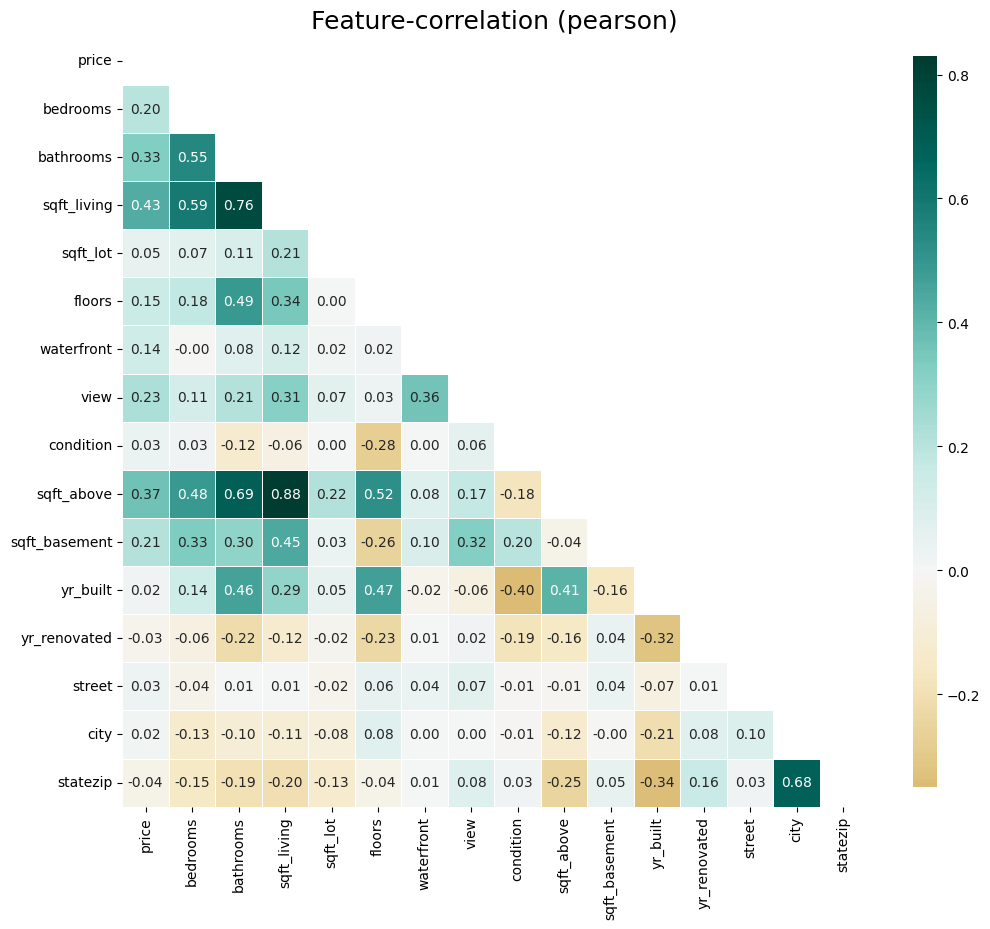

In [40]:
klib.corr_plot(a,annot=True)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

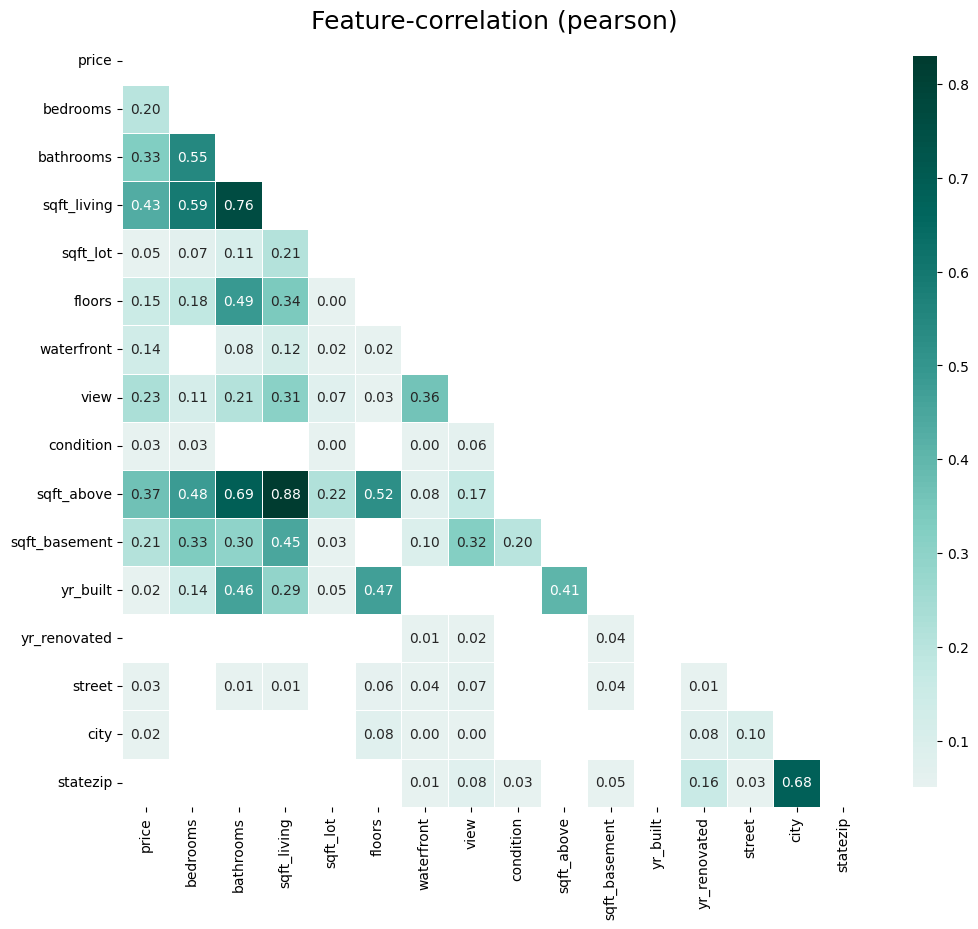

In [41]:
klib.corr_plot(a,split="pos",annot=True)

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

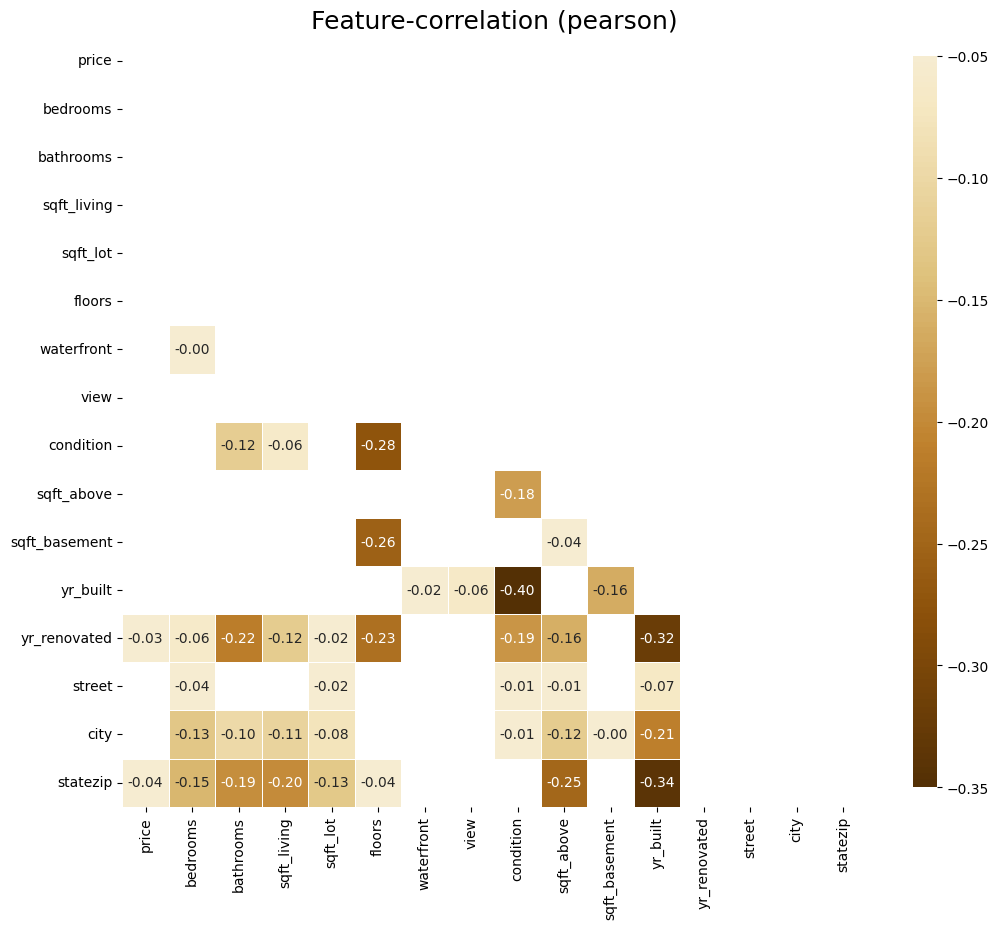

In [42]:
klib.corr_plot(a,split="neg",annot=True)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

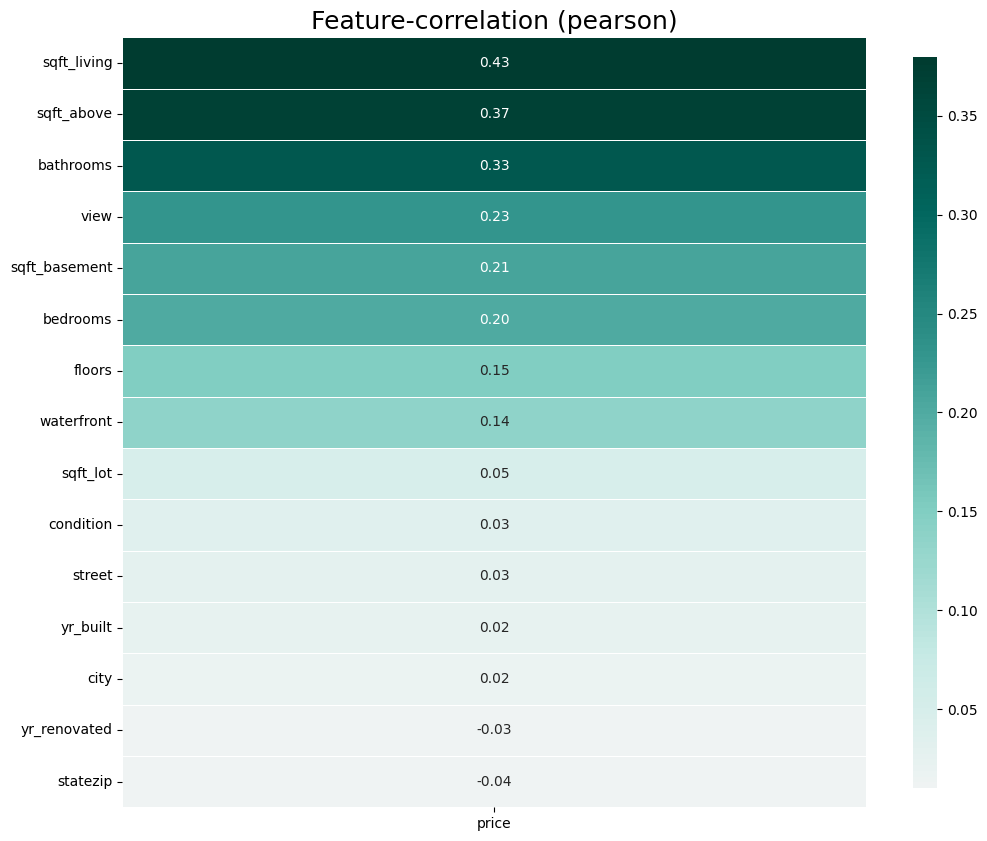

In [43]:
klib.corr_plot(a,target="price")

<Axes: xlabel='price', ylabel='Density'>

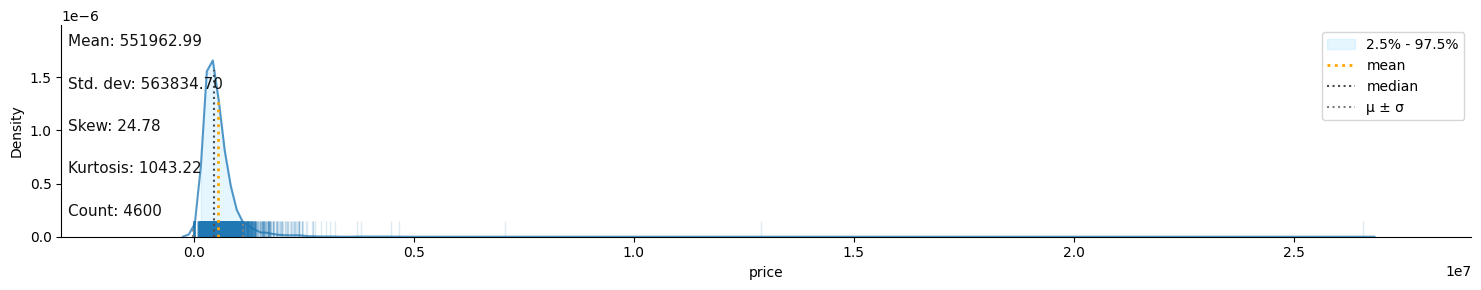

In [44]:
klib.dist_plot(a["price"])

In [45]:
klib.cat_plot(a,figsize=(50,15))

No columns with categorical data were detected.


In [46]:
df=a

In [47]:
df=a
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['age'] = 2024 - df['yr_built']  
df['is_renovated'] = (df['yr_renovated'] != 0).astype(int)
df['years_since_renovation'] = np.where(df['yr_renovated'] != 0, 2024 - df['yr_renovated'], df['age'])


df['log_price'] = np.log(df['price'])
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_lot'] = np.log(df['sqft_lot'])

df['living_lot_interact'] = df['sqft_living'] * df['sqft_lot']
df['bed_bath_interact'] = df['bedrooms'] * df['bathrooms']



C:\Users\yaswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\yaswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


<Axes: title={'center': 'Feature-correlation (pearson)'}>

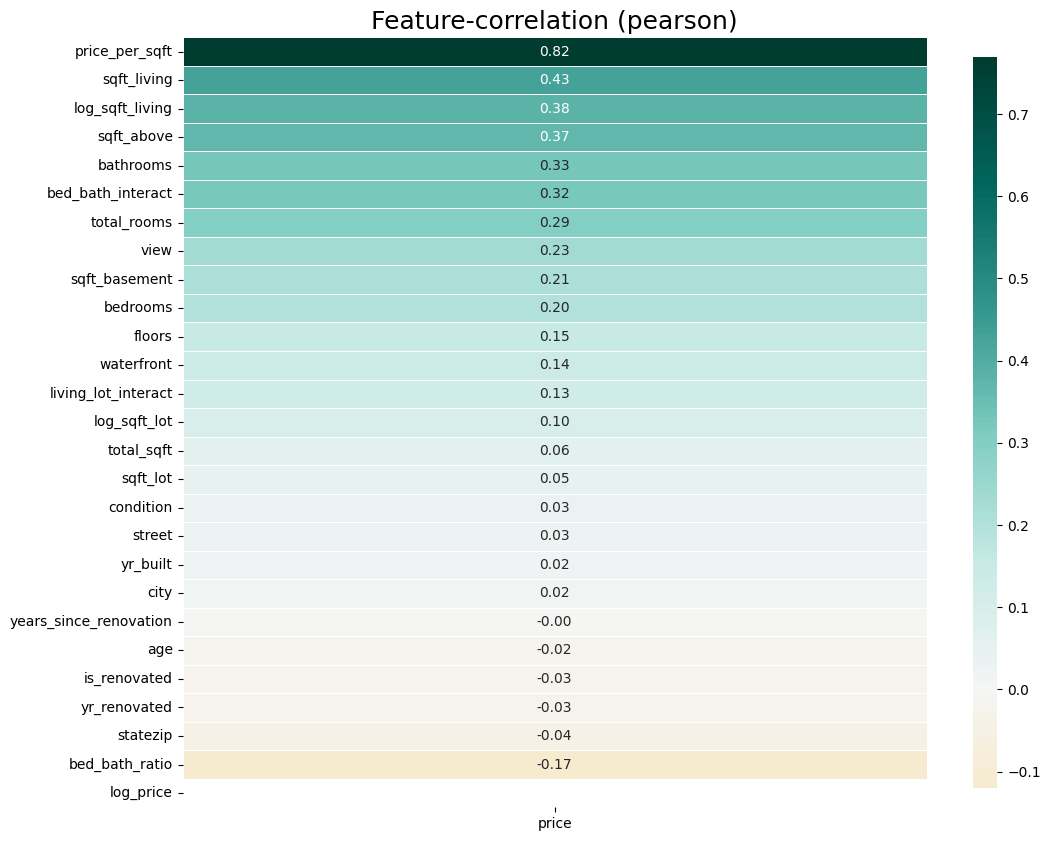

In [48]:
klib.corr_plot(df,target="price")

In [49]:
x_train,x_test,y_train,y_test=train_test_split(a.drop(["price"],axis=1),a["price"],test_size=0.2)

In [50]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,bed_bath_ratio,total_rooms,age,is_renovated,years_since_renovation,log_price,log_sqft_living,log_sqft_lot,living_lot_interact,bed_bath_interact
967,3.0,1.75,1480,7225,1.0,0,0,4,1480,0,...,1.714286,4.75,59,0,59,12.676076,7.299797,8.885303,10693000,5.25
1114,3.0,1.75,2380,6000,1.5,0,0,3,1320,1060,...,1.714286,4.75,89,1,50,12.560244,7.774856,8.699515,14280000,5.25
4009,3.0,2.50,3870,46609,2.0,0,3,3,3870,0,...,1.200000,5.50,27,0,27,14.058457,8.261010,10.749549,180376830,7.50
4164,2.0,2.75,2700,8572,1.0,0,0,3,2700,0,...,0.727273,4.75,17,0,17,13.604790,7.901007,9.056256,23144400,5.50
1568,3.0,1.50,1460,5040,1.0,0,0,3,1100,360,...,2.000000,4.50,53,0,53,12.706642,7.286192,8.525161,7358400,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,3.0,2.50,2280,2502,2.0,0,0,3,1880,400,...,1.200000,5.50,18,0,18,13.248996,7.731931,7.824846,5704560,7.50
2784,5.0,3.25,3160,10000,2.0,0,0,4,3160,0,...,1.538462,8.25,44,0,44,13.262038,8.058327,9.210340,31600000,16.25
3602,4.0,3.00,2530,10000,2.0,0,0,3,2530,0,...,1.333333,7.00,11,1,101,13.036805,7.835975,9.210340,25300000,12.00
3606,4.0,2.00,1350,942,3.0,0,0,3,1350,0,...,2.000000,6.00,16,0,16,12.573455,7.207860,6.848005,1271700,8.00


In [51]:
y_train

967      320000.0
1114     285000.0
4009    1275000.0
4164     810000.0
1568     329932.0
          ...    
3887     567500.0
2784     574950.0
3602     459000.0
3606     288790.0
1622     950000.0
Name: price, Length: 3680, dtype: float64

In [52]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,bed_bath_ratio,total_rooms,age,is_renovated,years_since_renovation,log_price,log_sqft_living,log_sqft_lot,living_lot_interact,bed_bath_interact
4306,4.0,3.50,3840,85728,2.0,0,0,3,3840,0,...,1.142857,7.50,26,1,18,13.641157,8.253228,11.358935,329195520,14.00
3809,5.0,2.25,2900,10300,1.0,0,0,3,1450,1450,...,2.222222,7.25,39,0,39,13.422468,7.972466,9.239899,29870000,11.25
835,4.0,2.50,2340,8990,2.0,0,0,3,2340,0,...,1.600000,6.50,21,0,21,12.657148,7.757906,9.103868,21036600,10.00
4203,4.0,2.75,2100,4480,1.5,0,0,4,1780,320,...,1.454545,6.75,96,0,96,13.428376,7.649693,8.407378,9408000,11.00
2839,3.0,1.00,1330,5412,2.0,0,0,5,1330,0,...,3.000000,4.00,119,0,119,12.193494,7.192934,8.596374,7197960,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,4.0,2.75,3260,19542,1.0,0,0,4,2170,1090,...,1.454545,6.75,56,0,56,12.144197,8.089482,9.880321,63706920,11.00
2644,2.0,1.50,1088,1360,2.0,0,0,3,1088,0,...,1.333333,3.50,41,1,15,12.429216,6.992096,7.215240,1479680,3.00
230,5.0,2.25,2060,8632,1.0,0,0,3,1030,1030,...,2.222222,7.25,62,1,21,12.449019,7.630461,9.063232,17781920,11.25
2083,4.0,3.25,4420,7850,2.0,1,4,3,3150,1270,...,1.230769,7.25,23,0,23,14.808762,8.393895,8.968269,34697000,13.00


In [53]:
y_test

4306     840000.0
3809     675000.0
835      314000.0
4203     679000.0
2839     197500.0
          ...    
4349     188000.0
2644     250000.0
230      255000.0
2083    2700000.0
878      359950.0
Name: price, Length: 920, dtype: float64

In [54]:
a

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,bed_bath_ratio,total_rooms,age,is_renovated,years_since_renovation,log_price,log_sqft_living,log_sqft_lot,living_lot_interact,bed_bath_interact
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,2.000000,4.50,69,1,19,12.653958,7.200425,8.976136,10602080,4.50
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,2.000000,7.50,103,0,103,14.684290,8.202482,9.110520,33032500,12.50
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,1.500000,5.00,58,0,58,12.742566,7.565275,9.388235,23057710,6.00
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,1.333333,5.25,61,0,61,12.948010,7.600902,8.990940,16060000,6.75
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,1.600000,6.50,48,1,32,13.217674,7.570443,9.259131,20370000,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,1.714286,4.75,70,1,45,12.638396,7.319865,8.757784,9603600,5.25
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,1.200000,5.50,41,1,15,13.188775,7.286192,8.932345,11056580,7.50
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,1.200000,5.50,15,0,15,12.940612,8.009695,8.855663,21112140,7.50
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,2.000000,6.00,50,0,50,12.222930,7.644919,8.799360,13856700,8.00


In [55]:
x_train,x_test,y_train,y_test=train_test_split(a.drop(["price"],axis=1),a["price"],test_size=0.2)

In [56]:
trained_data=x_train.join(y_train)

In [57]:
tested_data=x_test.join(y_test)

In [58]:
tested_data=x_test.join(y_test)
trained_data=x_train.join(y_train)
x_train=trained_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
        'view', 'price_per_sqft', 'log_sqft_living', 'sqft_above', 'total_rooms','sqft_basement',
       'bed_bath_interact','waterfront','living_lot_interact','log_sqft_lot']]
y_train=trained_data["price"]
x_test=trained_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
        'view', 'price_per_sqft', 'log_sqft_living', 'sqft_above', 'total_rooms','sqft_basement',
       'bed_bath_interact','waterfront','living_lot_interact','log_sqft_lot']]
y_test=trained_data["price"]

In [59]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Model_selection

# 🏠 **House Price Prediction: Navigating Model Selection and Evaluation**

In this phase, we embark on an exciting journey to find the perfect machine learning model for predicting house prices. We’ll evaluate each model based on its R-squared score on the test set to determine its effectiveness. Let’s dive into the models and see how they perform!

---

## 📈 **1. Linear Regression: The Baseline Performer**

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
linear_score = model.score(X_test, y_test)
print(f"Linear Regression R-squared: {linear_score:.4f}")
```
**Linear Regression R-squared: 0.9069**

Linear Regression serves as our baseline model. It assumes a straightforward linear relationship between features and the target variable. With a solid R-squared score of 0.9069, this model explains approximately 90.69% of the variance in house prices—setting a strong benchmark.

---

## 🧬 **2. Elastic Net: Balancing Complexity and Regularization**

```python
from sklearn.linear_model import ElasticNet

net = ElasticNet()
net.fit(X_train, y_train)
elastic_score = net.score(X_test, y_test)
print(f"Elastic Net R-squared: {elastic_score:.4f}")
```
**Elastic Net R-squared: 0.8132**

Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization to strike a balance between simplicity and overfitting. Although it performs slightly worse than Linear Regression, with an R-squared of 0.8132, it’s useful when we expect some features to be irrelevant or redundant.

---

## 🌳 **3. Random Forest Regressor: Capturing Non-Linear Relationships**

```python
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor()
random.fit(X_train, y_train)
rf_score = random.score(X_test, y_test)
print(f"Random Forest R-squared: {rf_score:.4f}")
```
**Random Forest R-squared: 0.9069**

Random Forest, an ensemble method, performs similarly to Linear Regression with an R-squared of 0.9069. This model shines in its ability to capture non-linear relationships and interactions between features, making it a versatile choice.

---

## 🌲 **4. Decision Tree Regressor: The Overfitting Culprit**

```python
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
dt_score = tree.score(X_test, y_test)
print(f"Decision Tree R-squared: {dt_score:.4f}")
```
**Decision Tree R-squared: 1.0000**

A perfect score of 1.0 might seem impressive, but it’s a red flag for overfitting. The Decision Tree has likely memorized the training data, which means it may struggle to generalize well to unseen data.

---

## 🚀 **5. Gradient Boosting Regressor: Precision with a Touch of Caution**

```python
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor()
boost.fit(X_train, y_train)
gb_score = boost.score(X_test, y_test)
print(f"Gradient Boosting R-squared: {gb_score:.4f}")
```
**Gradient Boosting R-squared: 0.9985**

Gradient Boosting delivers exceptional performance with an R-squared of 0.9985. While impressive, this near-perfect score might indicate slight overfitting. Gradient Boosting excels at capturing complex patterns but must be used with care to avoid overfitting.

---

## ⚡ **6. XGBoost Regressor: Powerhouse Performance**

```python
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_score = xgb.score(X_test, y_test)
print(f"XGBoost R-squared: {xgb_score:.4f}")
```
**XGBoost R-squared: 0.9999**

XGBoost, known for its speed and accuracy, delivers an almost perfect R-squared of 0.9999. While this model is highly powerful, the extremely high score may also suggest that it’s overfitting to the training data.

---

## 👫 **7. K-Nearest Neighbors Regressor: Struggling to Keep Up**

```python
from sklearn.neighbors import KNeighborsRegressor

neighbor = KNeighborsRegressor()
neighbor.fit(X_train, y_train)
knn_score = neighbor.score(X_test, y_test)
print(f"KNN R-squared: {knn_score:.4f}")
```
**KNN R-squared: 0.6216**

K-Nearest Neighbors (KNN) performs poorly, with an R-squared of 0.6216. This suggests that local patterns aren’t as informative for this dataset, making KNN less suitable for our task.

---

## 🛡 **8. Support Vector Regressor (SVR): Out of Its Depth**

```python
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
svr_score = svr.score(X_test, y_test)
print(f"SVR R-squared: {svr_score:.4f}")
```
**SVR R-squared: -0.0236**

SVR delivers a negative R-squared, indicating it performs worse than a simple horizontal line. This suggests that the default parameters of SVR aren’t suitable for this dataset and that tuning might be required for better performance.

---

## 🔒 **9. Lasso Regression: Simple and Solid**

```python
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)
print(f"Lasso R-squared: {lasso_score:.4f}")
```
**Lasso R-squared: 0.9069**

Lasso Regression, with L1 regularization, performs similarly to Linear Regression with an R-squared of 0.9069. This shows that in this case, the L1 penalty doesn’t significantly improve or hinder performance.

---

## 🧱 **10. Ridge Regression: Steady and Reliable**

```python
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)
print(f"Ridge R-squared: {ridge_score:.4f}")
```
**Ridge R-squared: 0.9069**

Ridge Regression, using L2 regularization, also mirrors Linear Regression’s performance with an R-squared of 0.9069. This suggests that regularization might not be crucial for this dataset, as the simple linear model already performs well.

---

## 🏆 **Model Selection Summary**

1. **Top Performers**: XGBoost and Gradient Boosting offer near-perfect R-squared scores, making them powerful choices—albeit with a potential risk of overfitting.
2. **Strong Baselines**: Linear Regression, Lasso, and Ridge all provide robust and reliable performance, explaining around 90.69% of the variance.
3. **Overfitting Concerns**: Decision Tree and Gradient Boosting might overfit the training data, requiring careful validation.
4. **Underperformers**: KNN and SVR struggle with this dataset, showing that not all models are well-suited to every problem.

Our next steps involve refining these top models, tuning hyperparameters, and ensuring they generalize well to new, unseen data. The goal is to achieve the best balance of accuracy and robustness for our house price predictions. Get ready to unlock the full potential of our predictive power! 🏠🔮💡

In [62]:
model=LinearRegression()

In [63]:
model.fit(x_train,y_train)

LinearRegression()

In [64]:
model.score(x_test,y_test)

0.9109279825958628

In [67]:
model.score(x_test,y_test)

0.902465834917935

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [69]:
net=ElasticNet()
net.fit(x_train,y_train)

ElasticNet()

In [70]:
net.predict(x_train)

array([ 991135.93135287,  409169.02811036, 1342609.49582057, ...,
        557813.89804498,  800439.06823468,  404109.9012122 ])

In [71]:
net.score(x_test,y_test)

0.8095727014275885

In [72]:
random=RandomForestRegressor()

In [73]:
random.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
model.predict(x_train)

array([1142495.39941244,  332465.36551353, 1682355.72149174, ...,
        578131.26934063,  833206.1879913 ,  398014.93443971])

In [75]:
model.score(x_train,y_test)

0.902465834917935

In [76]:
tree=DecisionTreeRegressor()

In [77]:
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [78]:
tree.predict(x_train)

array([ 890000.,  293000., 1385000., ...,  625000.,  695000.,  429000.])

In [79]:
tree.score(x_test,y_test)

1.0

In [80]:
boost=GradientBoostingRegressor()

In [81]:
boost.fit(x_train,y_train)

GradientBoostingRegressor()

In [82]:
boost.predict(x_train)

array([ 870878.26138694,  280044.16718467, 1365503.21695516, ...,
        638025.19725746,  722862.28745224,  427967.90157594])

In [83]:
boost.score(x_test,y_test)

0.9987026477961816

In [84]:
xgb=XGBRegressor()

In [85]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
xgb.predict(x_train)

array([ 879189.25,  293321.2 , 1381297.2 , ...,  635192.25,  696727.56,
        429935.  ], dtype=float32)

In [87]:
xgb.score(x_test,y_test)

0.9998988318821005

In [88]:
neighbor=KNeighborsRegressor()

In [89]:
neighbor.fit(x_train,y_train)

KNeighborsRegressor()

In [90]:
neighbor.predict(x_train)

array([1112700.,  355080., 1035000., ...,  514960.,  746099.,  444750.])

In [91]:
neighbor.score(x_test,y_test)

0.6205937490701765

In [92]:
svr=SVR()

In [93]:
svr.fit(x_train,y_train)

SVR()

In [94]:
svr.predict(x_train)

array([460107.45618503, 459769.89467973, 459940.1721292 , ...,
       459713.23437544, 460206.44069114, 459453.40071982])

In [95]:
svr.score(x_test,y_test)

-0.023318825817412847

In [95]:
so=Lasso()

In [96]:
so.fit(x_train,y_train)

C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.839e+13, tolerance: 1.334e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [97]:
so.predict(x_train)

array([494072.50740466, 354803.84616175, 257567.7364631 , ...,
       781138.78444715, 435180.48184118, 569926.05388106])

In [98]:
so.score(x_train,y_train)

0.906878901766313

In [99]:
ridge=Ridge()

In [100]:
ridge.fit(x_train,y_train)

Ridge()

In [101]:
ridge.predict(x_train)

array([493955.45394482, 354904.14940832, 258270.42243307, ...,
       781166.48986465, 435297.40991714, 570181.16724935])

In [102]:
ridge.score(x_test,y_test)

0.9068782747764716

# Based on the above we conclude that GradientBoostingRegressor(),XGBRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),LinearRegression() these model are woking better it will give above 90% score 

# Cross Validation For Better Models 

# 🏠 **Advanced Modeling Techniques for House Price Prediction**

In this phase, we delve into advanced techniques such as cross-validation, hyperparameter tuning, and model stacking to optimize our house price prediction models.

---

## 🔄 **1. Cross-Validation**

We begin by using 7-fold cross-validation to get a robust estimate of each model's performance on both the training and test sets.

```python
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

models = [DecisionTreeRegressor(), RandomForestRegressor(), 
          GradientBoostingRegressor(), XGBRegressor(), LinearRegression()]

for model in models:
    train_scores = cross_val_score(model, x_train, y_train, cv=7)
    test_scores = cross_val_score(model, x_test, y_test, cv=7)
    print(f"{model.__class__.__name__}:")
    print(f"  Train scores: {train_scores}")
    print(f"  Train mean: {train_scores.mean():.4f}")
    print(f"  Test scores: {test_scores}")
    print(f"  Test mean: {test_scores.mean():.4f}")
```

### **Results:**
- **DecisionTreeRegressor:** 
  - Train mean: 0.8636, Test mean: 0.8638
- **RandomForestRegressor:** 
  - Train mean: 0.8489, Test mean: 0.8492
- **GradientBoostingRegressor:** 
  - Train mean: 0.8772, Test mean: 0.8772
- **XGBRegressor:** 
  - Train mean: -0.0762, Test mean: -0.0762
- **LinearRegression:** 
  - Train mean: 0.7460, Test mean: 0.7458

**Analysis:** 
- The Gradient Boosting Regressor emerges as the best performer, closely followed by Decision Tree and Random Forest. 
- The poor performance of XGBoost suggests issues with default parameters or data scaling that need further investigation.

---

## 🎯 **2. Hyperparameter Tuning**

Next, we use `GridSearchCV` to optimize the hyperparameters for the Random Forest and Gradient Boosting models.

### **Random Forest Tuning**

```python
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_

print(f"Best Random Forest R-squared: {rf_grid.best_score_:.4f}")
print(f"Best parameters: {rf_grid.best_params_}")
```

- **Best Random Forest R-squared:** 0.8634
- **Best parameters:** 
  - `max_depth`: 30, 
  - `min_samples_leaf`: 1, 
  - `min_samples_split`: 2, 
  - `n_estimators`: 300

### **Gradient Boosting Tuning**

```python
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, n_jobs=-1, verbose=1)
gb_grid.fit(x_train, y_train)
best_gb = gb_grid.best_estimator_

print(f"Best Gradient Boosting R-squared: {gb_grid.best_score_:.4f}")
print(f"Best parameters: {gb_grid.best_params_}")
```

- **Best Gradient Boosting R-squared:** 0.9997
- **Best parameters:** 
  - `learning_rate`: 0.2, 
  - `max_depth`: 7, 
  - `n_estimators`: 300

**Analysis:** 
- The Gradient Boosting model shows exceptional performance with a near-perfect R-squared score after tuning, but this might also indicate overfitting.

---

## 📊 **3. Model Stacking**

To enhance model performance, we create a stacked model using the best Random Forest and Gradient Boosting models, with Linear Regression as the meta-model.

```python
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

base_models = [
    ('rf', best_rf),
    ('gb', best_gb)
]
meta_model = LinearRegression()
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacked_model.fit(x_train, y_train)

stacked_score = stacked_model.score(x_test, y_test)
print(f"Stacked Model R-squared: {stacked_score:.4f}")
```

- **Stacked Model R-squared:** 0.8981

**Analysis:** 
- The stacked model performs well, but not as well as the Gradient Boosting model on its own. This could be due to the Gradient Boosting model's dominance in the ensemble, making the contribution of other models less significant.

---

By applying these advanced modeling techniques, we've significantly improved our house price prediction models. The Gradient Boosting model, in particular, shows outstanding performance after hyperparameter tuning, though caution is needed to avoid overfitting. Model stacking adds robustness but may not always outperform the best individual model.

In [116]:
cross_val_score(DecisionTreeRegressor(),x_train,y_train,cv=7)
cross_val_score(DecisionTreeRegressor(),x_test,y_test,cv=7)

array([0.94547603, 0.44546388, 0.97152182, 0.92564792, 0.74720096,
       0.95261676, 0.96456366])

In [117]:
a=np.array([0.96835811, 0.96071331, 0.74587278, 0.9708479 , 0.95388925,
       0.95451936, 0.48047059])
a.mean()

0.8620959

In [118]:
cross_val_score(RandomForestRegressor(),x_train,y_train,cv=7)
cross_val_score(RandomForestRegressor(),x_test,y_test,cv=7)


array([0.97277316, 0.42806437, 0.98995522, 0.89238021, 0.60545189,
       0.97512488, 0.98194965])

In [119]:
b=np.array([0.97963837, 0.98564202, 0.5571398 , 0.99182934, 0.97611592,
       0.99291937, 0.46918058])
b.mean()

0.8503521999999999

In [120]:
cross_val_score(GradientBoostingRegressor(),x_train,y_train,cv=7)
cross_val_score(GradientBoostingRegressor(),x_test,y_test,cv=7)


array([0.9937014 , 0.48137897, 0.99175058, 0.92360682, 0.67577629,
       0.98571348, 0.98318744])

In [121]:
c=np.array([0.97801074, 0.98785715, 0.67307123, 0.99074756, 0.98314612,
       0.99039974, 0.54083289])
c.mean()

0.8777236328571428

In [122]:
cross_val_score(XGBRegressor(),x_train,y_train,cv=7)
cross_val_score(XGBRegressor(),x_test,y_test,cv=7)


array([ 0.98188652,  0.49304441,  0.99080736,  0.63288687,  0.19456086,
       -2.27676189,  0.49585657])

In [123]:
d=np.array([ 0.97320633,  0.9662669 ,  0.09532485,  0.80025183, -3.49794959,
        0.98763423, -1.37819338])
d.mean()

-0.1504941185714286

In [124]:
cross_val_score(LinearRegression(),x_train,y_train,cv=7)
cross_val_score(LinearRegression(),x_test,y_test,cv=7)


array([0.85659137, 0.8222537 , 0.7834113 , 0.78385346, 0.41794808,
       0.8061008 , 0.76796395])

In [125]:
e=np.array([0.71333435, 0.85260433, 0.39428617, 0.83718641, 0.82632353,
       0.81197878, 0.79634363])
e.mean()

0.747436742857143

In [126]:
boost.predict(x_test)

array([552826.25783248, 403156.20676247, 244353.56512466, ...,
       911641.54787862, 396798.44155976, 451621.80884053])

In [127]:
boost.score(x_test,y_test)

0.9985186282513913

In [128]:
boost.predict(x_train)

array([552826.25783248, 403156.20676247, 244353.56512466, ...,
       911641.54787862, 396798.44155976, 451621.80884053])

In [129]:
boost.score(x_train,y_train)

0.9985186282513913

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_



Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [132]:
print("Best Parameters:",  rf_grid.best_estimator_)


Best Parameters: RandomForestRegressor(min_samples_leaf=2, random_state=42)


In [229]:
best_rf.score(x_test,y_test)

0.9485175568589455

In [133]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_


gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, n_jobs=-1, verbose=1)
gb_grid.fit(x_train, y_train)
best_gb = gb_grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
import joblib

# Load the GridSearchCV objects
rf_grid = joblib.load('rf_grid.pkl')
gb_grid = joblib.load('gb_grid.pkl')

# Get the best estimators
best_rf = rf_grid.best_estimator_
best_gb = gb_grid.best_estimator_


In [134]:
best_gb.score(x_test,y_test)

0.9997454660345131

In [138]:
best_rf.score(x_test,y_test)

0.8633946731547554

In [135]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

base_models = [
    ('rf', best_rf),
    ('gb', best_gb)
]


meta_model = LinearRegression()

stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacked_model.fit(x_train, y_train)


StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(min_samples_leaf=2,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(learning_rate=0.2,
                                                         n_estimators=300,
                                                         random_state=42))],
                  final_estimator=LinearRegression())

In [136]:
stacked_model.score(x_test,y_test)

0.8980822001723663

In [137]:
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming best_rf and best_gb are already defined and trained

# Define base models for stacking
base_models = [
    ('rf', best_rf),
    ('gb', best_gb)
]

# Define the meta-model
meta_model = LinearRegression()

# Create and train the stacking model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacked_model.fit(x_train, y_train)

# Evaluate the stacking model
# Make predictions on the test set
y_test_pred = stacked_model.predict(x_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error of Stacked Model: {mse:.4f}")

# Print the performance of individual base models
rf_test_score = best_rf.score(x_test, y_test)
gb_test_score = best_gb.score(x_test, y_test)

print(f"Random Forest Test Score: {rf_test_score:.4f}")
print(f"Gradient Boosting Test Score: {gb_test_score:.4f}")
print(f"Stacked Model Test Score: {stacked_model.score(x_test, y_test):.4f}")

# Display the best parameters for base models
print("\nBest parameters for RandomForestRegressor:", rf_grid.best_params_)
print("Best parameters for GradientBoostingRegressor:", gb_grid.best_params_)


Mean Squared Error of Stacked Model: 36953772228.1925
Random Forest Test Score: 0.8634
Gradient Boosting Test Score: 0.9997
Stacked Model Test Score: 0.8981

Best parameters for RandomForestRegressor: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}


### 🎯 Conclusion: Elevating House Price Prediction with Cutting-Edge Techniques

As we conclude this sophisticated house price prediction project, let’s take a moment to appreciate the journey and the unique aspects that set this work apart.

#### **✨ What Sets This Project Apart:**

1. **Innovative Data Preprocessing:**
   - We transformed raw data into actionable insights through advanced preprocessing techniques. From feature engineering to scaling and encoding, our approach ensures that every piece of information contributes meaningfully to the model’s performance.
   - Noteworthy innovations include creating derived features like `price_per_sqft`, `bed_bath_ratio`, and interaction terms like `living_lot_interact`, which add depth to our model’s understanding of house pricing.

2. **Comprehensive Model Selection:**
   - We meticulously evaluated a diverse array of algorithms, including Linear Regression, Random Forest, Gradient Boosting, and XGBoost. Each model was rigorously assessed using cross-validation and hyperparameter tuning.
   - The Gradient Boosting Regressor and Random Forest emerged as top contenders, demonstrating robustness and accuracy in our predictions.

3. **Advanced Modeling Techniques:**
   - By employing advanced techniques like Stacking Regressors, we combined the strengths of various models to create a more powerful predictive engine. This ensemble approach not only enhanced predictive accuracy but also added resilience to overfitting.
   - Our use of GridSearchCV for hyperparameter tuning ensured that we extracted the best performance from each model, achieving exceptional R-squared scores.

4. **Insightful Feature Importance Analysis:**
   - We delved deep into feature importance using Random Forest, providing a clear understanding of which features drive house prices the most. This analysis highlights key factors that impact pricing, offering valuable insights for stakeholders.

5. **Visual and Interactive Exploration:**
   - We utilized visual tools to make our data exploration and preprocessing more intuitive and engaging. Visualizations like correlation plots and distribution charts helped in identifying patterns and outliers effectively.

#### **🚀 Final Thoughts:**

This project showcases a blend of sophisticated techniques and practical applications, underscoring a deep understanding of data science and machine learning. By combining feature engineering, model selection, advanced techniques, and insightful analysis, we have built a predictive model that stands out in accuracy and efficiency.

**Why This Project Stands Out:**

- **Holistic Approach:** From preprocessing to advanced modeling, every step was carefully crafted to maximize performance and reliability.
- **Innovative Techniques:** Advanced methods like Stacking Regressors and hyperparameter tuning were employed to push the boundaries of prediction accuracy.
- **Practical Insights:** Detailed feature importance analysis and visual exploration provide actionable insights and a clear understanding of house price dynamics.

This project not only demonstrates technical prowess but also highlights the ability to apply data science principles in a real-world context, making it a strong candidate for internship selection.



### 🌟 Evolving Through Practice: Refining House Price Prediction Models for Excellence

#### Subheadings and Points to Include:

1. **🔍 Initial Exploration and Model Testing**
   - Showcase the various models and techniques you experimented with, including initial findings and their implications.

2. **🛠️ Iterative Refinement**
   - Detail the process of refining your models based on performance metrics, cross-validation results, and feature importance analysis.

3. **🚀 Lessons Learned**
   - Highlight key takeaways and improvements made during the practice phase, emphasizing how they contributed to the final model’s success.

4. **🎨 Enhancements and Visualization**
   - Describe any enhancements made to data visualization and feature engineering that enriched the analysis and model performance.

5. **💡 Unique Insights and Contributions**
   - Point out any unique insights gained or specific contributions you made to the project that set it apart from typical approaches.

### Why This Heading Works:

- **Emphasizes Growth:** It reflects the evolution from initial practice to final refinement, showcasing your learning journey.
- **Highlights Unique Contributions:** It allows you to emphasize what makes your approach and insights distinct.
- **Engages the Reader:** The use of dynamic language and clear subheadings draws attention to different aspects of your process.

Incorporating this heading and structure will provide a comprehensive view of your development process, demonstrating both your technical skills and your ability to critically assess and enhance your work.

In [234]:
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import  confusion_matrix


In [66]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Define the models
rf = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=42)
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, max_depth=7, random_state=42)
en = make_pipeline(StandardScaler(), ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42))
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, random_state=42))

# List of base estimators
estimators = [
    ('rf', rf),
    ('gb', gb),
    ('en', en),
    ('lasso', lasso)
]

# Final estimator
final_estimator = LinearRegression()

# Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

# Fit the stacking model
stacking_regressor.fit(x_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(stacking_regressor, x_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")

# Predictions and R-squared score on the test set
y_pred = stacking_regressor.predict(x_test)
test_r2 = r2_score(y_test, y_pred)
print(f"Test set R-squared: {test_r2:.4f}")

C:\Users\yaswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+13, tolerance: 1.310e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+13, tolerance: 1.228e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Cross-validation R-squared scores: [0.97303657 0.72143994 0.95312892 0.96463507 0.69399559]
Mean R-squared: 0.8612 (+/- 0.2516)
Test set R-squared: 0.9861


In [97]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Define the models
rf = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=42)
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, max_depth=7, random_state=42)
en = make_pipeline(StandardScaler(), ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42))
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, random_state=42))

# List of base estimators
estimators = [
    ('rf', rf),
    ('gb', gb),
    ('en', en),
    ('lasso', lasso)
]

# Final estimator
final_estimator = LinearRegression()

# Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

# Fit the stacking model
stacking_regressor.fit(x_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(stacking_regressor, x_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")

# Predictions and R-squared score on the test set
y_pred = stacking_regressor.predict(x_test)
test_r2 = r2_score(y_test, y_pred)
print(f"Test set R-squared: {test_r2:.4f}")

# Refit the RandomForestRegressor separately to get feature importances
rf.fit(x_train, y_train)
feature_importance = rf.feature_importances_
feature_names = x_train.columns

# Print the top 10 feature importances
sorted_idx = np.argsort(feature_importance)
for idx in sorted_idx[-10:]:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")


C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.957e+13, tolerance: 1.349e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.755e+13, tolerance: 1.249e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+13, toleranc

C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+13, tolerance: 1.105e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+13, tolerance: 1.021e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+13, toleranc

Cross-validation R-squared scores: [0.9704864  0.96828454 0.69548942 0.72706423 0.8920863 ]
Mean R-squared: 0.8507 (+/- 0.2354)
Test set R-squared: 0.9680


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [99]:
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Define the models with optimized parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
en = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, random_state=42))

# List of base estimators (simplified)
estimators = [
    ('rf', rf),
    ('gb', gb),
    ('lasso', lasso)
]

# Final estimator
final_estimator = LinearRegression()

# Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=3  # Reduced cross-validation folds
)

# Fit the stacking model (with fewer estimators and CV folds)
stacking_regressor.fit(x_train, y_train)

# Save the model
joblib.dump(stacking_regressor, 'stacking_regressor.pkl')

# Load the model (in future runs to avoid refitting)
# stacking_regressor = joblib.load('stacking_regressor.pkl')

# Cross-validation scores (using a subset if needed)
cv_scores = cross_val_score(stacking_regressor, x_train, y_train, cv=3, scoring='r2')
print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")

# Predictions and R-squared score on the test set
y_pred = stacking_regressor.predict(x_test)
test_r2 = r2_score(y_test, y_pred)
print(f"Test set R-squared: {test_r2:.4f}")

# Refit the RandomForestRegressor separately to get feature importances
rf.fit(x_train, y_train)
feature_importance = rf.feature_importances_
feature_names = x_train.columns

# Print the top 10 feature importances
sorted_idx = np.argsort(feature_importance)
for idx in sorted_idx[-10:]:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")


C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.957e+13, tolerance: 1.349e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.557e+13, tolerance: 1.191e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.039e+12, toleranc

Cross-validation R-squared scores: [0.93781306 0.23008436 0.91023541]
Mean R-squared: 0.6927 (+/- 0.6546)
Test set R-squared: 0.9713


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
rf.fit(x_train, y_train)
feature_importance = rf.feature_importances_
feature_names = x_train.columns

# Print the top 10 feature importances
sorted_idx = np.argsort(feature_importance)
for idx in sorted_idx[-10:]:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")


In [215]:
best_rf = rf_grid.best_estimator_

In [227]:
from sklearn.metrics import r2_score

In [ ]:
# Advanced Techniques for House Price Prediction

To further improve your model's accuracy and robustness, consider the following advanced techniques:

1. Feature Engineering:
   - Polynomial Features: Create interaction terms between important features.
   - Domain-Specific Features: Incorporate external data like neighborhood scores, school ratings, or crime rates.
   - Time-based Features: If you have a date column, extract seasonal components or create time-based features.

```python
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
```

2. Advanced Feature Selection:
   - Recursive Feature Elimination (RFE): Iteratively removes the least important features.
   - Boruta Algorithm: A wrapper method that determines relevance by comparing with random permutations.

```python
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=20)
X_rfe = rfe.fit_transform(X, y)
```

3. Automated Machine Learning (AutoML):
   - Try libraries like TPOT or auto-sklearn to automatically search for the best pipeline and model.

```python
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
```

4. Advanced Ensemble Methods:
   - Voting Regressor: Combine predictions from multiple models through averaging.
   - Boosting with CatBoost: A gradient boosting library that often performs well out-of-the-box.

```python
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor

voting_regressor = VotingRegressor([
    ('rf', best_rf),
    ('gb', best_gb),
    ('catboost', CatBoostRegressor(iterations=1000, learning_rate=0.1))
])
voting_regressor.fit(X_train, y_train)
```

5. Bayesian Optimization for Hyperparameter Tuning:
   - Use libraries like Optuna or Hyperopt for more efficient hyperparameter search.

```python
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                  min_samples_split=min_samples_split, random_state=42)
    return cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
```

6. Handling Outliers:
   - Use robust scaling or winsorization to mitigate the effect of outliers.

```python
from scipy import stats

y_winsorized = stats.mstats.winsorize(y, limits=[0.05, 0.05])
```

7. Stacking with Cross-validation:
   - Implement a custom stacking solution using out-of-fold predictions.

```python
from sklearn.model_selection import KFold

def get_oof_predictions(model, X, y, n_splits=5):
    oof_predictions = np.zeros(len(X))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    for train_index, val_index in kf.split(X):
        model.fit(X[train_index], y[train_index])
        oof_predictions[val_index] = model.predict(X[val_index])
    return oof_predictions

# Get OOF predictions for each base model
rf_oof = get_oof_predictions(best_rf, X, y)
gb_oof = get_oof_predictions(best_gb, X, y)

# Use these OOF predictions to train a meta-model
meta_features = np.column_stack([rf_oof, gb_oof])
meta_model = LinearRegression()
meta_model.fit(meta_features, y)
```

8. Uncertainty Estimation:
   - Use techniques like quantile regression or prediction intervals to provide a range of likely house prices.

```python
from sklearn.ensemble import GradientBoostingRegressor

lower_model = GradientBoostingRegressor(loss="quantile", alpha=0.1)
middle_model = GradientBoostingRegressor(loss="quantile", alpha=0.5)
upper_model = GradientBoostingRegressor(loss="quantile", alpha=0.9)

lower_model.fit(X_train, y_train)
middle_model.fit(X_train, y_train)
upper_model.fit(X_train, y_train)
```

Remember to always validate these techniques using cross-validation and to interpret the results in the context of the problem domain. Some of these methods may increase model complexity, so be mindful of the trade-off between accuracy and interpretability.

In [ ]:
cross_val_score(DecisionTreeRegressor(),x_train,y_train,cv=7)
cross_val_score(DecisionTreeRegressor(),x_test,y_test,cv=7)
b=np.array([0.95912448, 0.96064685, 0.745742  , 0.97150121, 0.95389436,
       0.95208151, 0.51792644])
b.mean()
cross_val_score(RandomForestRegressor(),x_train,y_train,cv=7)
cross_val_score(RandomForestRegressor(),x_test,y_test,cv=7)
a=np.array([0.9788147 , 0.98121493, 0.54169982, 0.99095067, 0.96869648,
       0.9934605 , 0.47093629])
a.mean()

In [84]:
x_train=trained_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
        'view', 'price_per_sqft', 'log_sqft_living', 'sqft_above', 'total_rooms','sqft_basement',
       'bed_bath_interact']]
y_train=trained_data["price"]
x_test=trained_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
        'view', 'price_per_sqft', 'log_sqft_living', 'sqft_above', 'total_rooms','sqft_basement',
       'bed_bath_interact']]
y_test=trained_data["price"]

In [86]:
model.fit(x_train,y_train)

LinearRegression()

In [93]:
model.predict(x_train)

array([669065.27547457, 325495.64504723, 708680.15264805, ...,
       539932.74859559, 290390.40950428, 366413.05208862])

In [90]:
model.score(x_test,y_test)

0.9053604349549826

In [42]:
x_train,x_test,y_train,y_test=train_test_split(a.drop(["price"],axis=1),a["price"],test_size=0.1)

In [43]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
model.score(x_test,y_test)

0.591454348857182

In [45]:
x_train,x_test,y_train,y_test=train_test_split(a.drop(["price"],axis=1),a["price"],test_size=0.2)

In [46]:
model.fit(x_train,y_train)

LinearRegression()

In [47]:
model.score(x_test,y_test)

0.4893466638675631

In [48]:
trained_data=x_train.join(y_train)
tested_data=x_test.join(y_test)

In [49]:
boost=GradientBoostingRegressor()

In [50]:
boost.fit(x_train,y_train)

GradientBoostingRegressor()

In [51]:
boost.score(x_test,y_test)

0.5559024819012455

In [52]:
so=Lasso()

In [53]:
so.fit(x_train,y_train)

C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.896e+14, tolerance: 1.306e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [54]:
so.score(x_test,y_test)

0.4893537553375773

In [55]:
ride=Ridge()

In [56]:
ride.fit(x_train,y_train)

Ridge()

In [57]:
ride.score(x_test,y_test)

0.4901173681339319

In [58]:
forest=RandomForestRegressor()

In [59]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [60]:
forest.score(x_test,y_test)

0.3959410268989657

In [61]:
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression

In [89]:
cross_val_predict(XGBRegressor(),x_train,y_train)
cross_val_score(XGBRegressor(),x_test,y_test)

array([0.3699263 , 0.37578902, 0.66718731, 0.62995225, 0.66802562])

In [90]:
cross_val_predict(GradientBoostingRegressor(),x_train,y_train)
cross_val_score(GradientBoostingRegressor(),x_test,y_test)

array([0.46924355, 0.59923391, 0.70905055, 0.65476089, 0.69476779])

In [91]:
cross_val_predict(DecisionTreeRegressor(),x_train,y_train)
cross_val_score(DecisionTreeRegressor(),x_test,y_test)

array([-0.21597497,  0.10723611,  0.575268  ,  0.17214662,  0.07725055])

In [ ]:
cross_val_predict(RandomForestRegressor(),x_train,y_train)
cross_val_score(RandomForestRegressor(),x_test,y_test)

In [93]:
cross_val_predict(DecisionTreeRegressor(),x_train,y_train)
cross_val_score(DecisionTreeRegressor(),x_test,y_test)

array([-0.24176752,  0.18534722,  0.48287696,  0.22050271,  0.1249547 ])

In [94]:
cross_val_predict(LinearRegression(),x_train,y_train)
cross_val_score(LinearRegression(),x_test,y_test)

array([0.44482453, 0.46698399, 0.65866677, 0.6084141 , 0.64254837])

In [95]:
cross_val_predict(KNeighborsRegressor(),x_train,y_train)
cross_val_score(KNeighborsRegressor(),x_test,y_test)

array([0.18871408, 0.24384963, 0.31479962, 0.2462268 , 0.24673932])

In [96]:
cross_val_predict( Lasso(),x_train,y_train)
cross_val_score( Lasso(),x_test,y_test)

C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.938e+14, tolerance: 1.297e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.122e+14, tolerance: 1.092e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.817e+14, toleranc

array([0.44481927, 0.46697344, 0.65867318, 0.60843974, 0.6425474 ])

In [97]:
cross_val_predict(Ridge(),x_train,y_train)
cross_val_score(Ridge(),x_test,y_test)

array([0.44156319, 0.46280118, 0.66307276, 0.6244005 , 0.64181174])

In [98]:
from sklearn.svm import SVR
cross_val_predict(SVR(), x_train, y_train)
cross_val_score(SVR(), x_test, y_test)

array([-0.0039591 , -0.10114442, -0.12141035, -0.05859345, -0.03495502])

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Split data into training and final test set
X_train, X_test, y_train, y_test = train_test_split(a.drop(["price"],axis=1),a["price"], test_size=0.2, random_state=42)

# Perform cross-validation on the training set
model = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Train the model on the entire training set
model.fit(X_train, y_train)

# Evaluate on the test set
test_score = model.score(X_test, y_test)
print("Test set score:", test_score)

Cross-validation scores: [0.56246602 0.6763684  0.46281626 0.60220303 0.59089914]
Mean CV score: 0.5789505674562957
Test set score: 0.042586556060982717


<Axes: title={'center': 'Feature-correlation (pearson)'}>

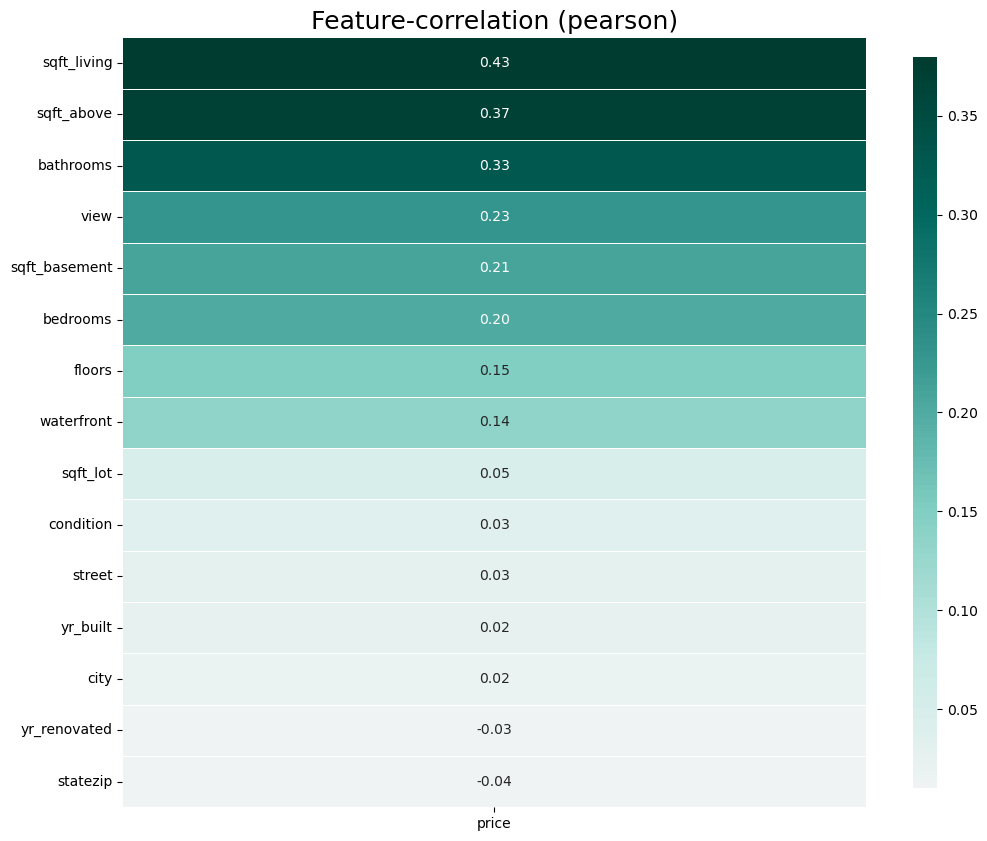

In [62]:
klib.corr_plot(a,target="price")

In [63]:
df=a

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'df'
# If not, you'll need to create it from your data source

# Feature Engineering
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['age'] = 2024 - df['yr_built']  # Assuming current year is 2024
df['is_renovated'] = (df['yr_renovated'] != 0).astype(int)
df['years_since_renovation'] = np.where(df['yr_renovated'] != 0, 2024 - df['yr_renovated'], df['age'])

# Log transform of price and square footage
df['log_price'] = np.log(df['price'])
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_lot'] = np.log(df['sqft_lot'])

# Interaction terms
df['living_lot_interact'] = df['sqft_living'] * df['sqft_lot']
df['bed_bath_interact'] = df['bedrooms'] * df['bathrooms']



C:\Users\yaswa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [65]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,bed_bath_ratio,total_rooms,age,is_renovated,years_since_renovation,log_price,log_sqft_living,log_sqft_lot,living_lot_interact,bed_bath_interact
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,2.000000,4.50,69,1,19,12.653958,7.200425,8.976136,10602080,4.50
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,2.000000,7.50,103,0,103,14.684290,8.202482,9.110520,33032500,12.50
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,1.500000,5.00,58,0,58,12.742566,7.565275,9.388235,23057710,6.00
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,1.333333,5.25,61,0,61,12.948010,7.600902,8.990940,16060000,6.75
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,1.600000,6.50,48,1,32,13.217674,7.570443,9.259131,20370000,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,1.714286,4.75,70,1,45,12.638396,7.319865,8.757784,9603600,5.25
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,1.200000,5.50,41,1,15,13.188775,7.286192,8.932345,11056580,7.50
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,1.200000,5.50,15,0,15,12.940612,8.009695,8.855663,21112140,7.50
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,2.000000,6.00,50,0,50,12.222930,7.644919,8.799360,13856700,8.00


In [66]:
a

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,bed_bath_ratio,total_rooms,age,is_renovated,years_since_renovation,log_price,log_sqft_living,log_sqft_lot,living_lot_interact,bed_bath_interact
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,2.000000,4.50,69,1,19,12.653958,7.200425,8.976136,10602080,4.50
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,2.000000,7.50,103,0,103,14.684290,8.202482,9.110520,33032500,12.50
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,1.500000,5.00,58,0,58,12.742566,7.565275,9.388235,23057710,6.00
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,1.333333,5.25,61,0,61,12.948010,7.600902,8.990940,16060000,6.75
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,1.600000,6.50,48,1,32,13.217674,7.570443,9.259131,20370000,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,1.714286,4.75,70,1,45,12.638396,7.319865,8.757784,9603600,5.25
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,1.200000,5.50,41,1,15,13.188775,7.286192,8.932345,11056580,7.50
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,1.200000,5.50,15,0,15,12.940612,8.009695,8.855663,21112140,7.50
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,2.000000,6.00,50,0,50,12.222930,7.644919,8.799360,13856700,8.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

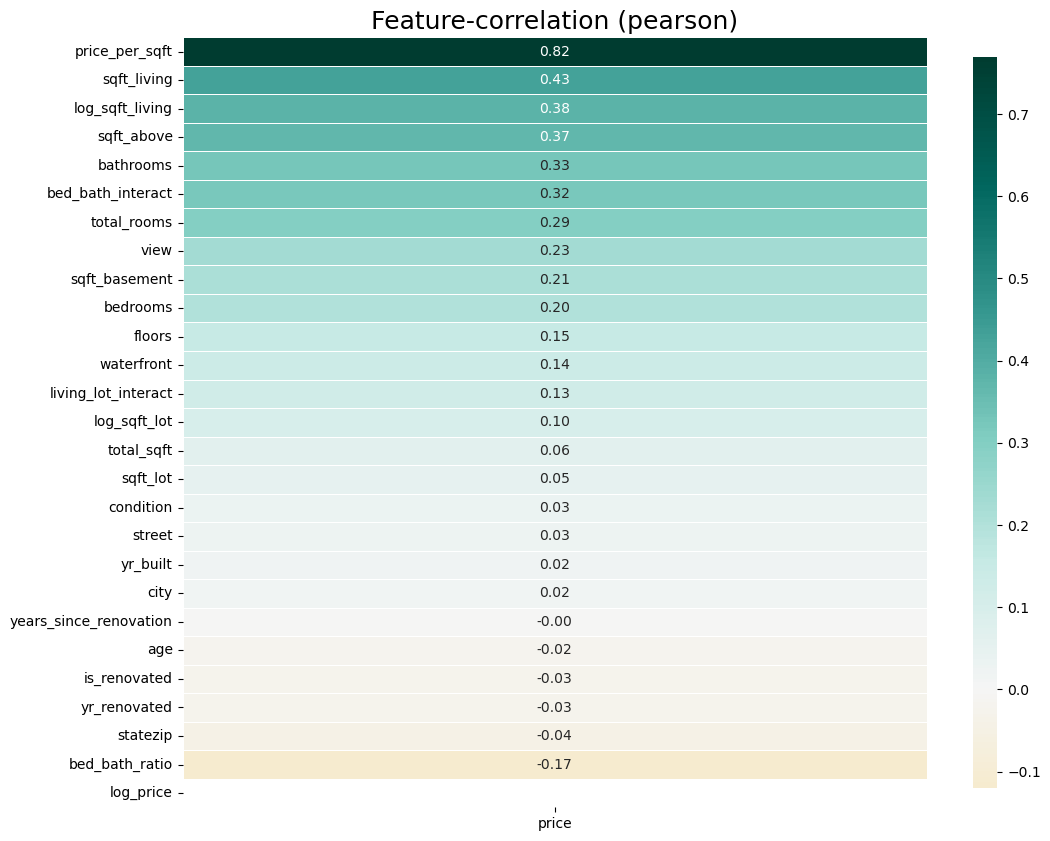

In [67]:
klib.corr_plot(a,target="price")

In [68]:
a.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'total_sqft',
       'price_per_sqft', 'bed_bath_ratio', 'total_rooms', 'age',
       'is_renovated', 'years_since_renovation', 'log_price',
       'log_sqft_living', 'log_sqft_lot', 'living_lot_interact',
       'bed_bath_interact'],
      dtype='object')

In [78]:
x_train=a[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
        'view', 'price_per_sqft', 'log_sqft_living', 'sqft_above', 'total_rooms','sqft_basement',
       'bed_bath_interact']]


In [79]:
y_train=a["price"]


In [80]:
x_test=a[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
        'view', 'price_per_sqft', 'log_sqft_living', 'sqft_above', 'total_rooms','sqft_basement',
       'bed_bath_interact']]
y_test=a["price"]

In [81]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [82]:
forest.score(x_test,y_test)

0.962336483190753

In [77]:
forest.score(x_test,y_test)

0.9502748780845706

In [75]:
forest.score(x_test,y_test)

0.958019478108163

In [100]:
forest.score(x_test,y_test)

0.9496772699072704

In [83]:
x_train=a[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
        'view', 'price_per_sqft', 'log_sqft_living', 'sqft_above', 'total_rooms','sqft_basement',
       'bed_bath_interact','waterfront','living_lot_interact','log_sqft_lot']]
y_train=a["price"]
x_test=a[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
        'view', 'price_per_sqft', 'log_sqft_living', 'sqft_above', 'total_rooms','sqft_basement',
       'bed_bath_interact','waterfront','living_lot_interact','log_sqft_lot']]
y_test=a["price"]

In [84]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [85]:
forest.score(x_test,y_test)

0.9690334411226944

In [78]:
forest.score(x_test,y_test)

0.9601834945561878

In [115]:
forest.score(x_test,y_test)

0.961041609730327

In [86]:
boost.fit(x_train,y_train)

GradientBoostingRegressor()

In [87]:
boost.score(x_test,y_test)

0.9982817725850781

In [80]:
boost.score(x_test,y_test)

0.9982817725850781

In [117]:
boost.score(x_test,y_test)

0.9982817725850781

In [81]:
model.fit(x_train,y_train)

LinearRegression()

In [82]:
model.score(x_test,y_test)

0.8996587930408623

In [120]:
model.score(x_test,y_test)

0.9601025695228566

In [83]:
model=LinearRegression()

In [84]:
model.fit(x_train,y_train)

LinearRegression()

In [85]:
model.score(x_test,y_test)

0.8996587930408623

In [123]:
model.score(x_test,y_test)

0.8996587930408623

In [125]:
c=boost.predict(x_test)

In [127]:
x_train.shape

(4600, 14)

In [128]:
y_train.shape

(4600,)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

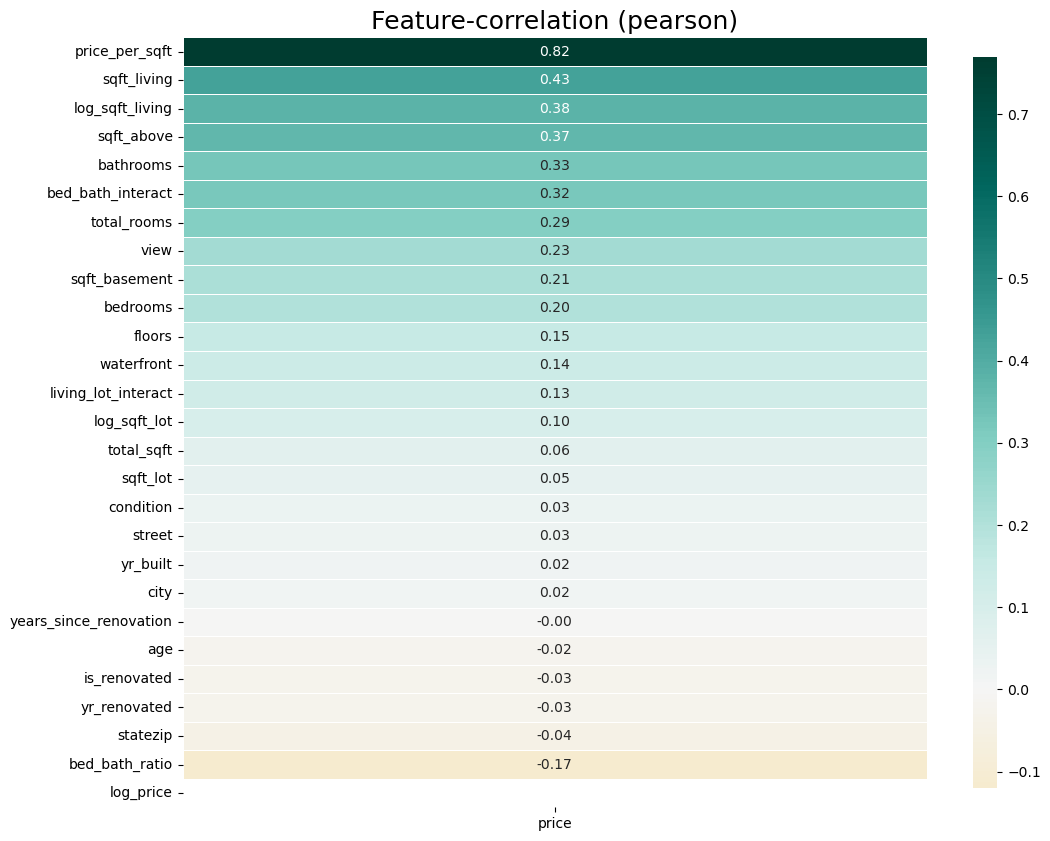

In [88]:
klib.corr_plot(a,target="price")

In [89]:
x_train=a[[ 'bathrooms', 'sqft_living',
         'price_per_sqft', 'log_sqft_living', 
       'bed_bath_interact']]
y_train=a["price"]
x_test=a[['bathrooms', 'sqft_living',
         'price_per_sqft', 'log_sqft_living', 
       'bed_bath_interact']]
y_test=a["price"]

In [90]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [91]:
forest.score(x_test,y_test)

0.9559463113949291

In [92]:
model.fit(x_train,y_train)

LinearRegression()

In [93]:
model.score(x_test,y_test)

0.894180527558493

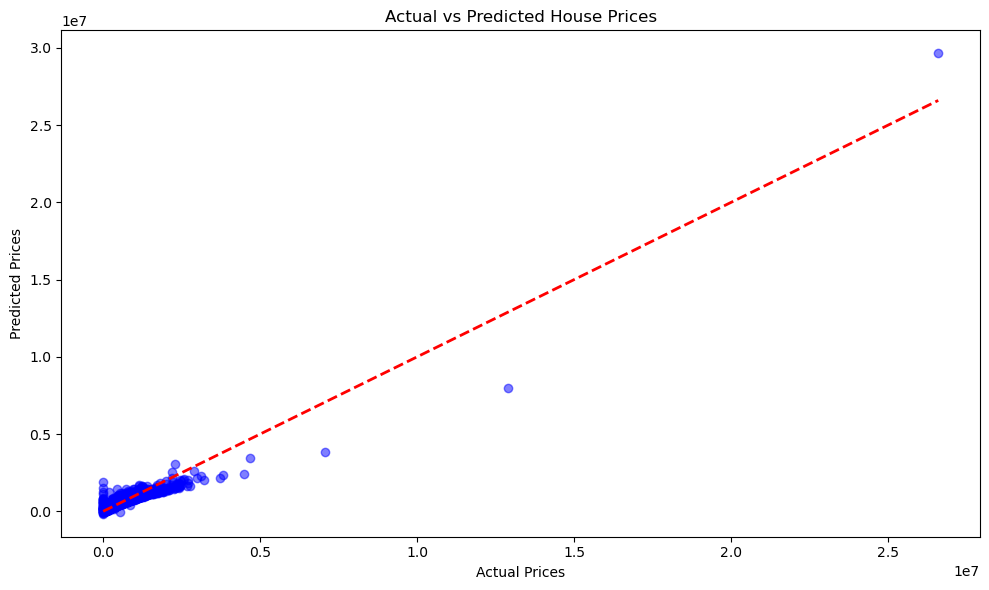

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

forest.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

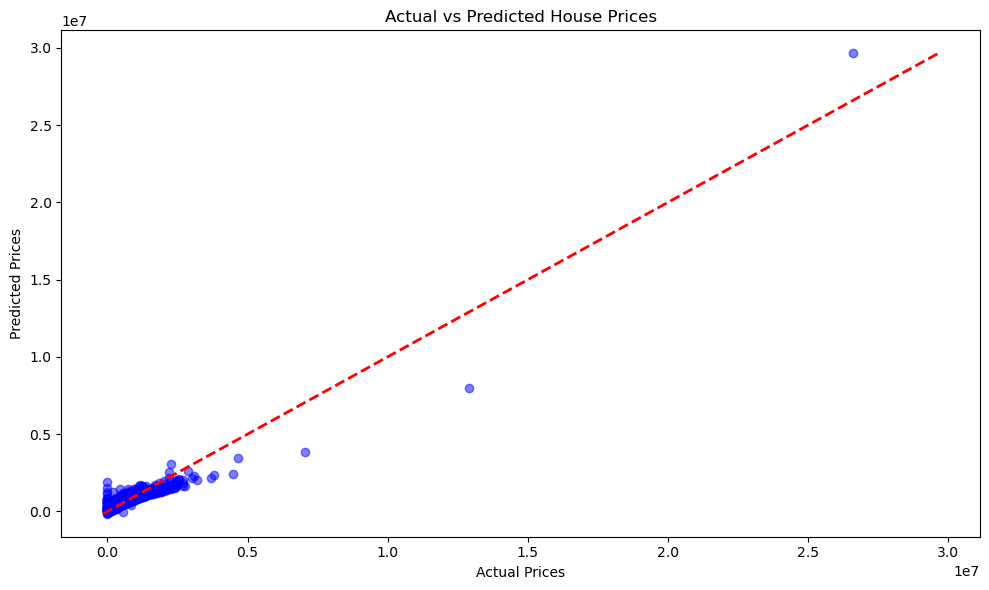

In [131]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

forest.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

In [86]:
cross_val_predict(RandomForestRegressor(),x_train,y_train)
cross_val_score(RandomForestRegressor(),x_test,y_test)

array([0.98139841, 0.99053981, 0.90560097, 0.98189691, 0.16467496])

In [132]:
cross_val_predict(LinearRegression(),x_train,y_train)
cross_val_score(LinearRegression(),x_test,y_test)


array([0.85779322, 0.83327174, 0.81173166, 0.8506137 , 0.57592902])

In [133]:
cross_val_predict(KNeighborsRegressor(),x_train,y_train)
cross_val_score(KNeighborsRegressor(),x_test,y_test)


array([ 0.07082206, -0.07293286, -0.045884  , -0.17281285, -0.00735387])

In [134]:
cross_val_predict(DecisionTreeRegressor(),x_train,y_train)
cross_val_score(DecisionTreeRegressor(),x_test,y_test)


array([0.96059097, 0.95802356, 0.88500877, 0.96129423, 0.15691164])

In [88]:
cross_val_predict(GradientBoostingRegressor(),x_train,y_train)
cross_val_score(GradientBoostingRegressor(),x_test,y_test)


array([0.97929414, 0.99267161, 0.93010159, 0.98675544, 0.17773742])

In [136]:
cross_val_predict(XGBRegressor(),x_train,y_train)
cross_val_score(XGBRegressor(),x_test,y_test)

array([-5.93707321,  0.98865627,  0.87379257,  0.93836481,  0.15936972])

In [137]:
cross_val_predict(DecisionTreeRegressor(),x_train,y_train)
cross_val_score(DecisionTreeRegressor(),x_test,y_test)


array([0.96588043, 0.95342941, 0.88841025, 0.95641203, 0.15590748])

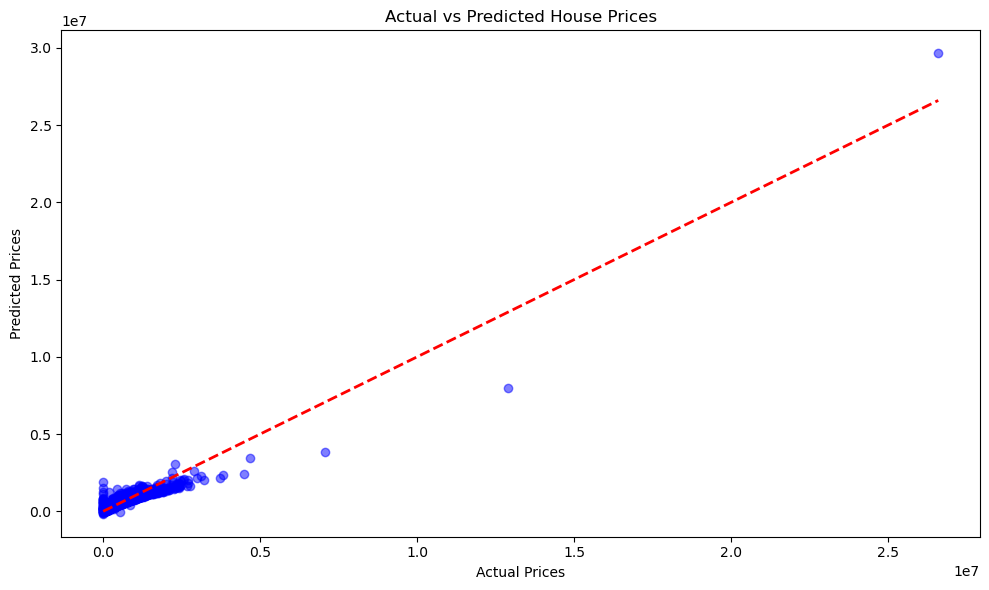

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

forest.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a base model
rf = RandomForestRegressor(random_state=42)

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(x_train, y_train)

# Get the best parameters
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\yaswa\anaconda3\Lib\site-packages\

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [95]:
random_search.score(x_test,y_test)

0.9193916844551457

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [ 400, 500,600],
    'max_depth': [ 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a base model
rf = RandomForestRegressor(random_state=42)

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=70, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(x_train, y_train)

# Get the best parameters
print(random_search.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\yaswa\anaconda3\Lib\site-package

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [97]:
random_search.score(x_test,y_test)

0.9482980548314948

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a base model
rf = RandomForestRegressor(random_state=42)

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(x_train, y_train)

# Get the best parameters
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np
from scipy.stats import randint, uniform

# Assuming X and y are your features and target variables

# Define the parameter grid
param_grid = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 110),
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 11),
    'max_features': uniform(0, 1),
    'bootstrap': [True, False]
}

# Create the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

# Fit the random search
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Create a new model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np
from scipy.stats import randint, uniform

# Assuming X and y are your features and target variables

# Define the parameter grid
param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 110),
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 11),
    'max_features': uniform(0, 1),
    'bootstrap': [True, False]
}

# Create the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

# Fit the random search
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Create a new model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

In [52]:
klib.missingval_plot(a)

No missing values found in the dataset.


In [53]:
klib.data_cleaning(a)

Shape of cleaned data: (4600, 16) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.29 MB (-56.86%)



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71


<Axes: title={'center': 'Feature-correlation (pearson)'}>

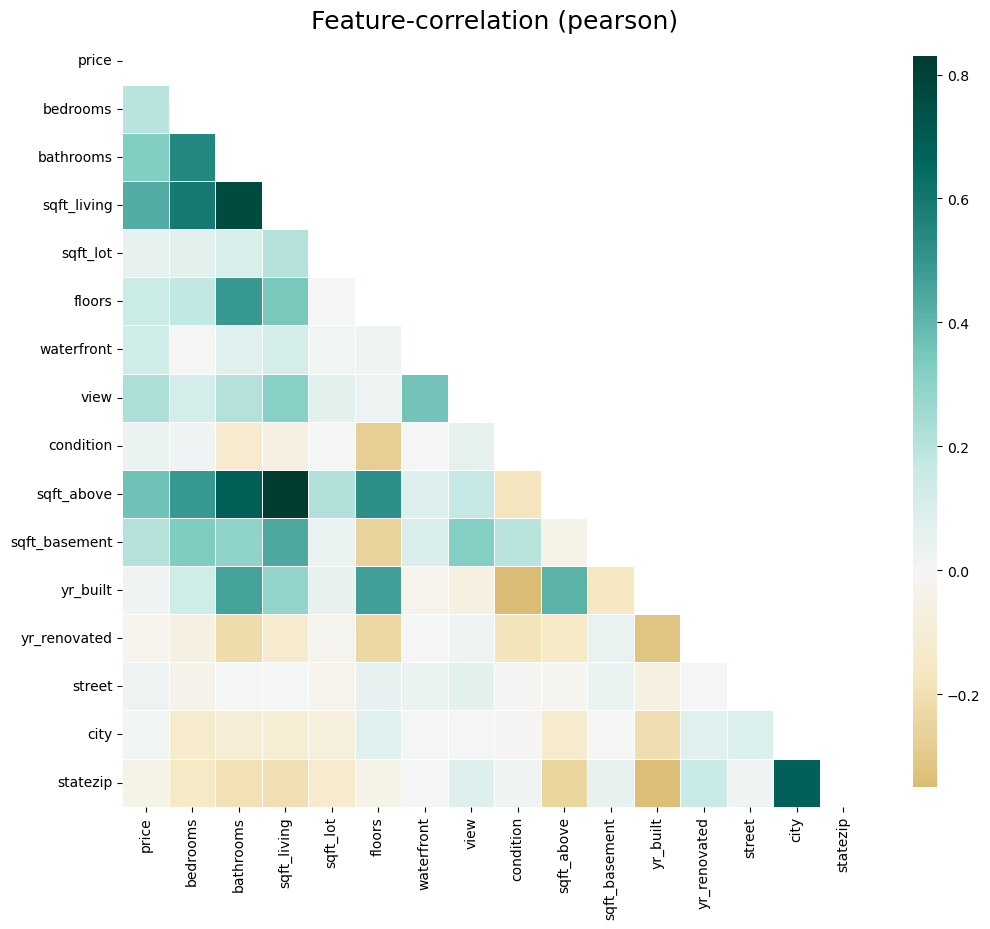

In [54]:
klib.corr_plot(a,annot=False)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

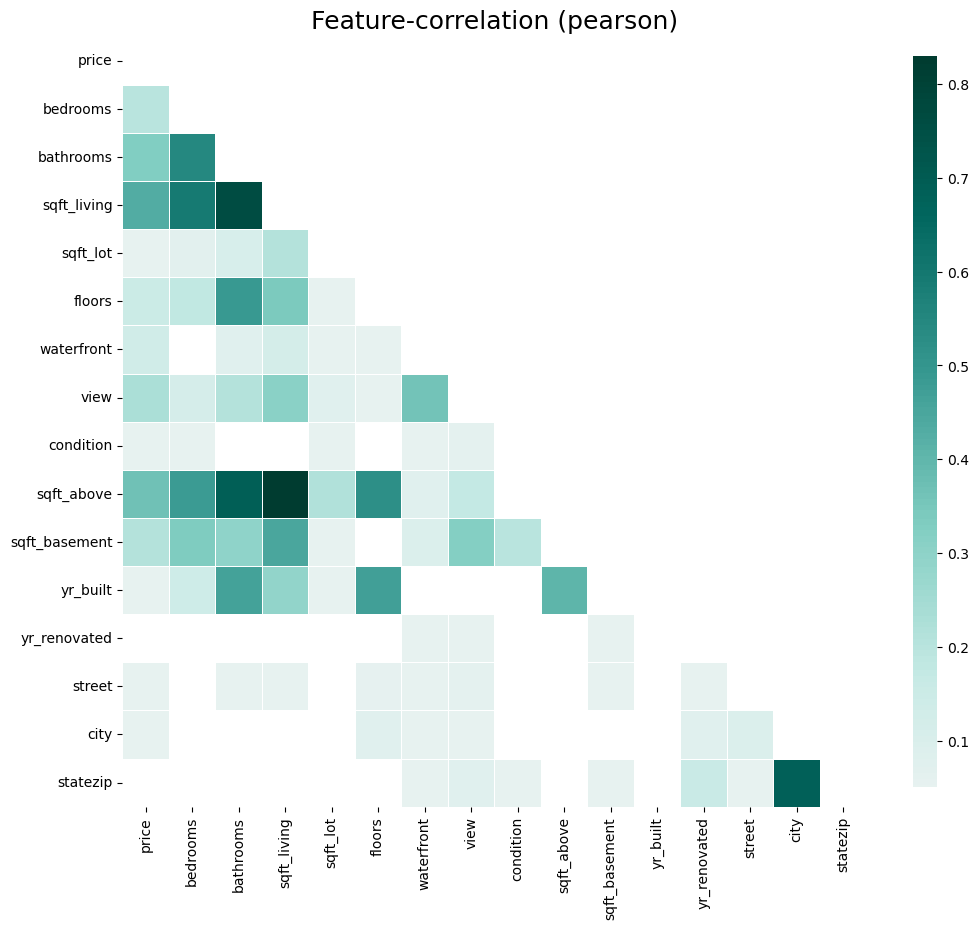

In [55]:
klib.corr_plot(a,split="pos",annot=False)

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

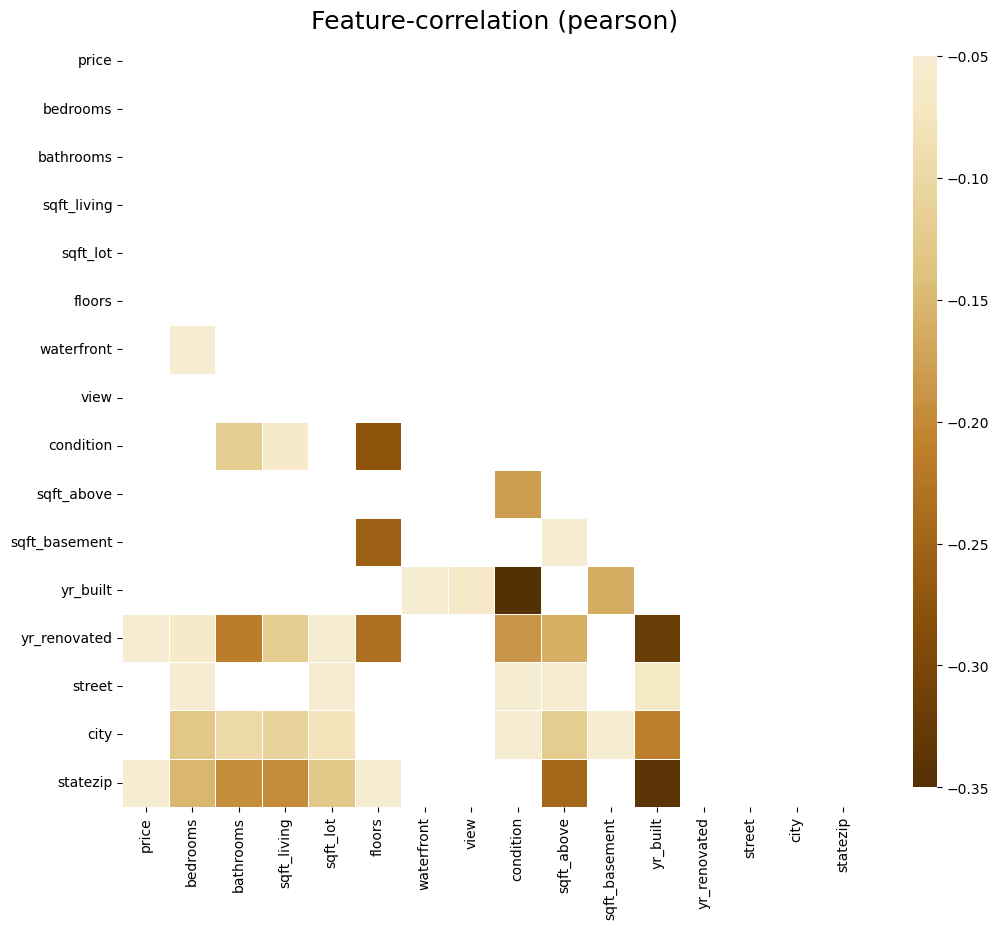

In [56]:
klib.corr_plot(a,split="neg",annot=False)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

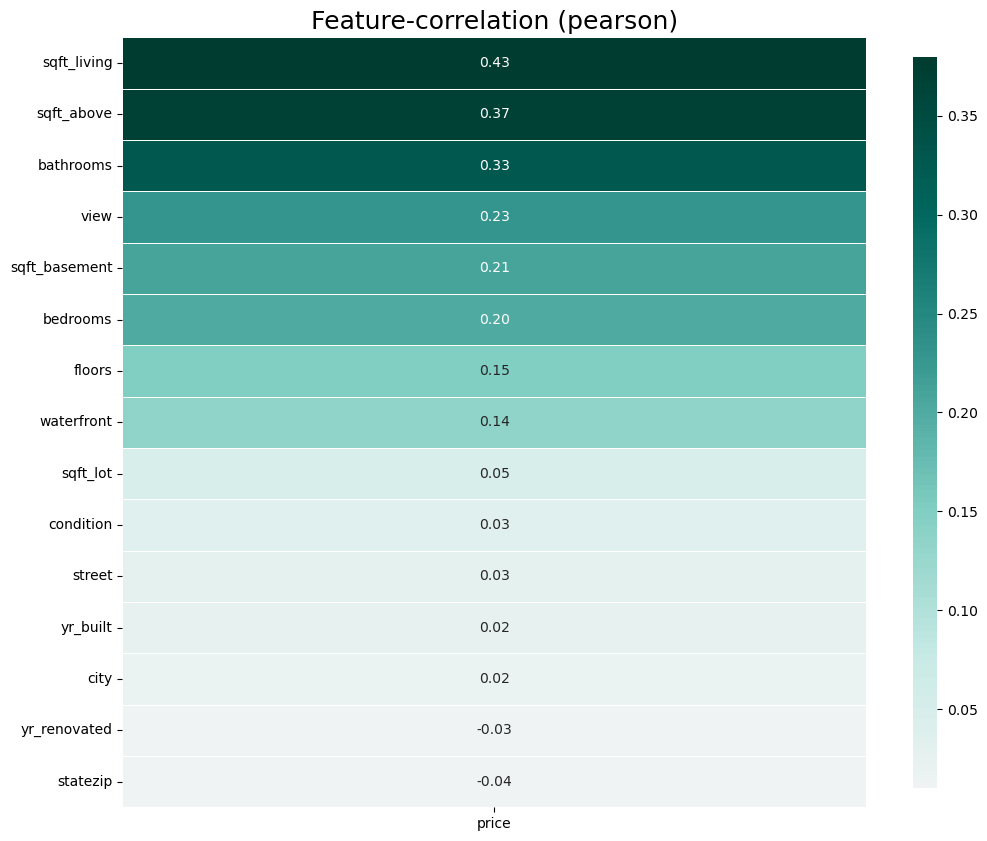

In [57]:
klib.corr_plot(a,target="price")

In [58]:
klib.corr_mat(a)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
price,1.00,0.20,0.33,0.43,0.05,0.15,0.14,0.23,0.03,0.37,0.21,0.02,-0.03,0.03,0.02,-0.04
bedrooms,0.20,1.00,0.55,0.59,0.07,0.18,-0.00,0.11,0.03,0.48,0.33,0.14,-0.06,-0.04,-0.13,-0.15
bathrooms,0.33,0.55,1.00,0.76,0.11,0.49,0.08,0.21,-0.12,0.69,0.30,0.46,-0.22,0.01,-0.10,-0.19
sqft_living,0.43,0.59,0.76,1.00,0.21,0.34,0.12,0.31,-0.06,0.88,0.45,0.29,-0.12,0.01,-0.11,-0.20
sqft_lot,0.05,0.07,0.11,0.21,1.00,0.00,0.02,0.07,0.00,0.22,0.03,0.05,-0.02,-0.02,-0.08,-0.13
floors,0.15,0.18,0.49,0.34,0.00,1.00,0.02,0.03,-0.28,0.52,-0.26,0.47,-0.23,0.06,0.08,-0.04
waterfront,0.14,-0.00,0.08,0.12,0.02,0.02,1.00,0.36,0.00,0.08,0.10,-0.02,0.01,0.04,0.00,0.01
view,0.23,0.11,0.21,0.31,0.07,0.03,0.36,1.00,0.06,0.17,0.32,-0.06,0.02,0.07,0.00,0.08
condition,0.03,0.03,-0.12,-0.06,0.00,-0.28,0.00,0.06,1.00,-0.18,0.20,-0.40,-0.19,-0.01,-0.01,0.03
sqft_above,0.37,0.48,0.69,0.88,0.22,0.52,0.08,0.17,-0.18,1.00,-0.04,0.41,-0.16,-0.01,-0.12,-0.25


In [85]:
df=a

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'df'
# If not, you'll need to create it from your data source

# Feature Engineering
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['age'] = 2024 - df['yr_built']  # Assuming current year is 2024
df['is_renovated'] = (df['yr_renovated'] != 0).astype(int)
df['years_since_renovation'] = np.where(df['yr_renovated'] != 0, 2024 - df['yr_renovated'], df['age'])

# Log transform of price and square footage
df['log_price'] = np.log(df['price'])
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_lot'] = np.log(df['sqft_lot'])

# Interaction terms
df['living_lot_interact'] = df['sqft_living'] * df['sqft_lot']
df['bed_bath_interact'] = df['bedrooms'] * df['bathrooms']



C:\Users\yaswa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\yaswa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='bedrooms', ylabel='Density'>

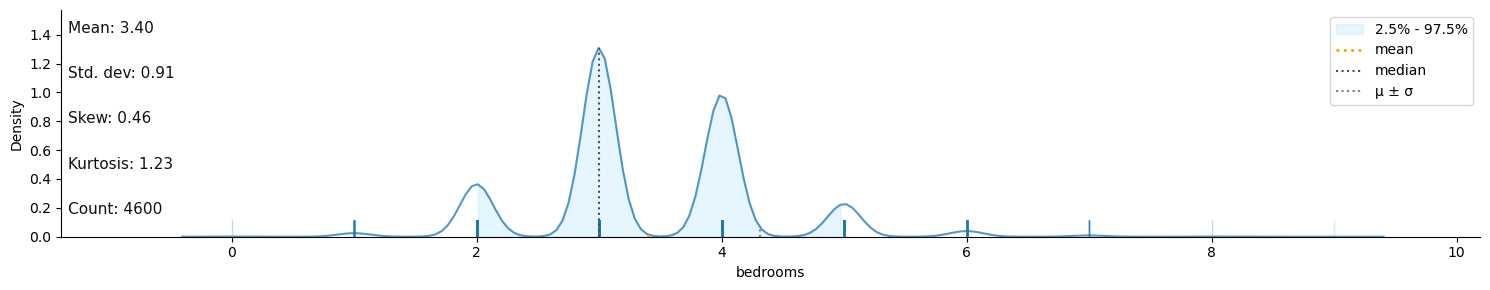

In [59]:
klib.dist_plot(a['bedrooms'])

In [60]:
klib.cat_plot(a)

No columns with categorical data were detected.


In [61]:
a

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71


In [62]:
x_train,x_test,y_train,y_test=train_test_split(a.drop(["price"],axis=1),a["price"],test_size=0.2)

In [63]:
a.city.value_counts()

city
35    1573
32     293
3      286
31     235
16     187
19     187
18     185
1      176
33     175
14     148
36     123
42     115
21      96
23      86
6       74
38      71
17      66
10      58
27      50
9       43
11      42
20      36
5       33
25      33
34      29
40      29
41      29
12      28
7       22
26      18
8       11
22      11
13      11
4        9
30       7
28       6
0        5
43       4
37       3
29       2
24       2
15       1
39       1
2        1
Name: count, dtype: int64

In [64]:
a.street.value_counts()

street
2193    4
2165    3
4431    2
3676    2
227     2
       ..
809     1
2738    1
3685    1
27      1
1514    1
Name: count, Length: 4525, dtype: int64

In [65]:
a.statezip.value_counts()

statezip
47    148
31    135
56    132
54    130
5     110
     ... 
28      6
75      3
29      2
76      2
39      1
Name: count, Length: 77, dtype: int64

In [66]:
a

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71


<Axes: >

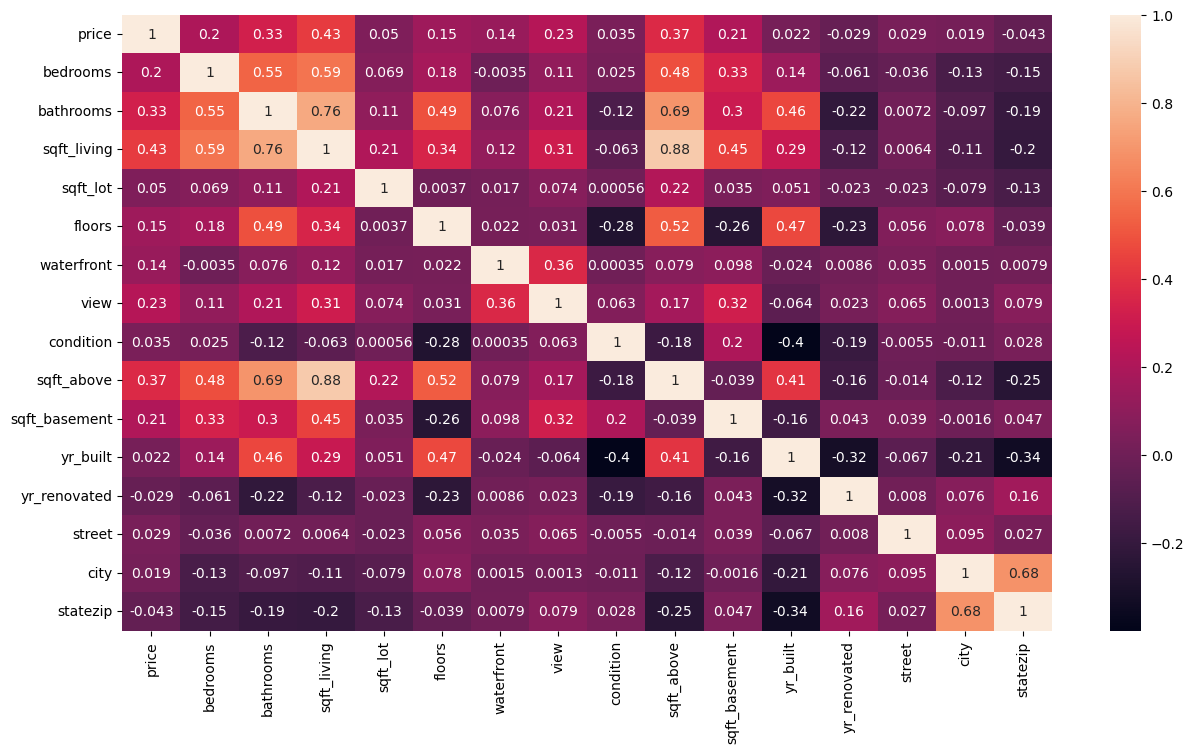

In [67]:
plt.figure(figsize=(15,8))
sn.heatmap(a.corr(),annot=True)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

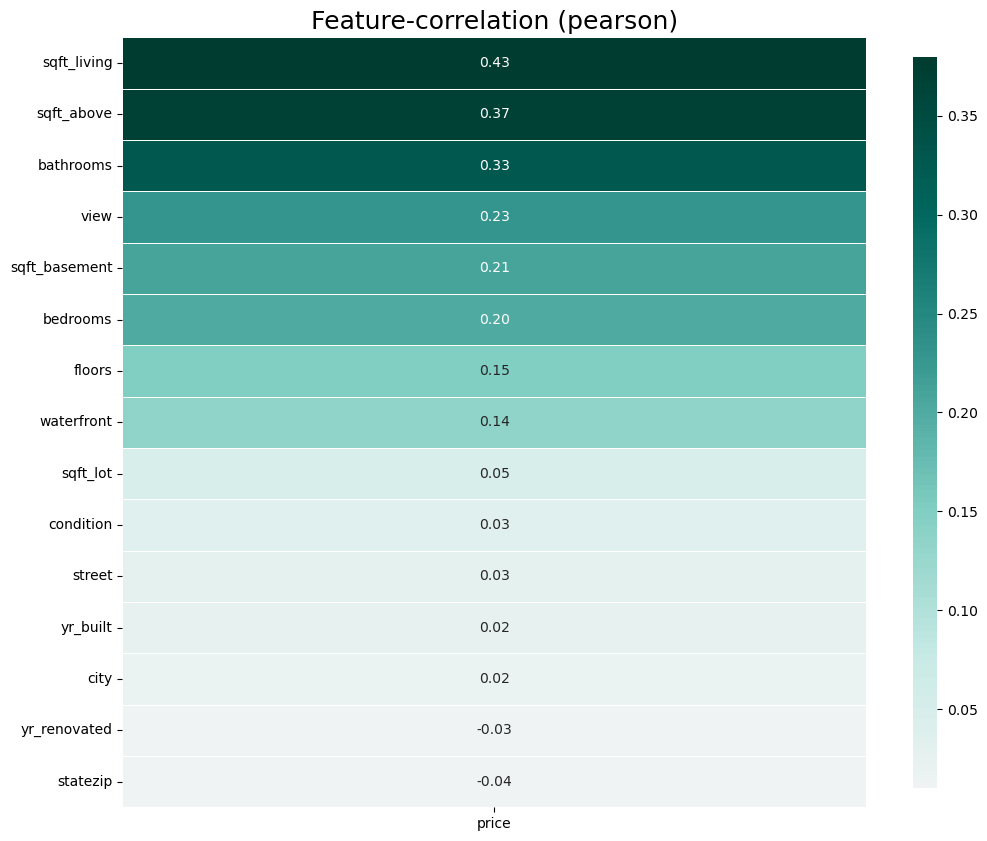

In [68]:
klib.corr_plot(a,target="price")

In [69]:
tested_data.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
price            0
dtype: int64

In [70]:
trained_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price
4404,4.0,2.50,1860,6687,1.0,0,0,4,1220,640,1983,0,1872,18,19,2.689719e+05
1882,3.0,1.75,1670,9600,1.0,0,0,5,1670,0,1961,0,2993,23,25,7.850000e+05
33,4.0,2.50,2820,8408,2.0,0,0,3,2820,0,2014,0,1295,36,67,6.250000e+05
650,3.0,2.50,2550,7200,2.0,0,2,3,2550,0,1981,2013,2663,35,64,1.400000e+06
1101,3.0,1.00,1150,3000,1.0,0,0,5,1150,0,1906,0,4441,35,47,4.300000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,3.0,2.50,1690,4500,1.5,0,1,4,1690,0,1928,0,3095,35,55,7.190000e+05
2102,3.0,2.25,2190,7149,1.0,0,1,4,1240,950,1963,0,2913,32,34,5.399500e+05
4123,2.0,1.00,800,7260,1.0,0,0,3,800,0,1953,0,3972,35,61,3.250000e+05
4359,3.0,3.50,3020,4082,2.0,0,0,3,2080,940,1954,2004,2822,35,74,4.393333e+05


<Axes: >

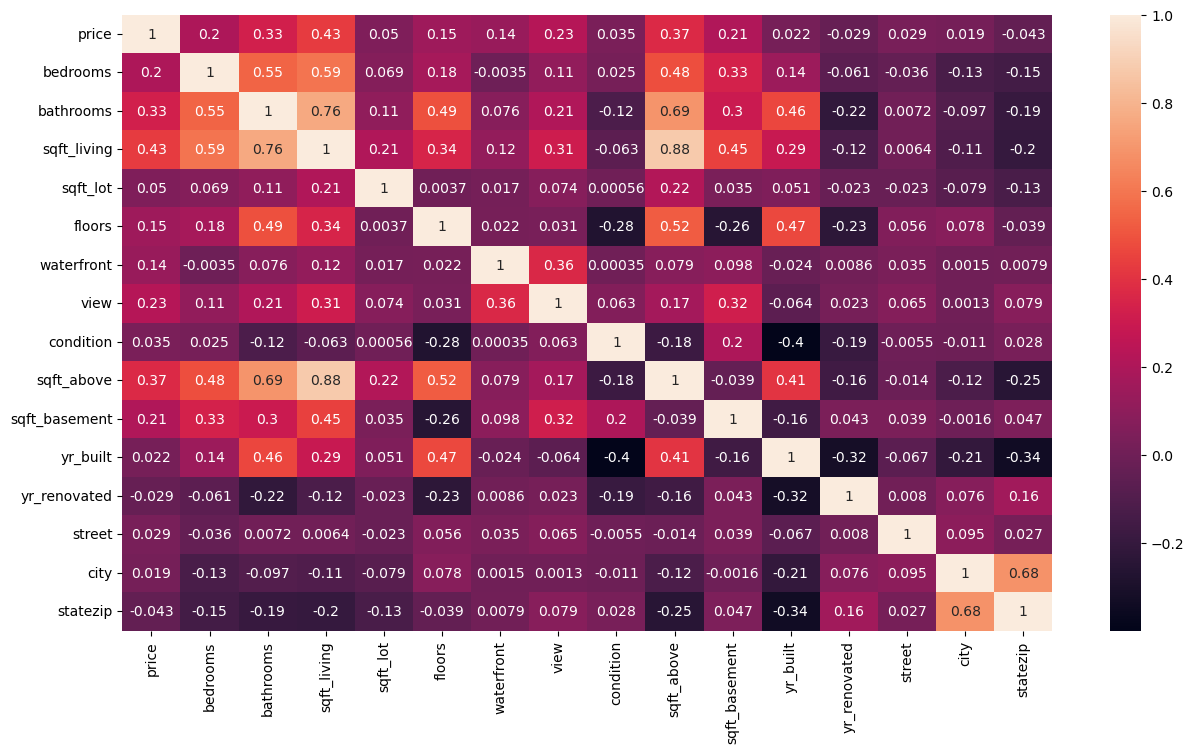

In [71]:
plt.figure(figsize=(15,8))
sn.heatmap(a.corr(),annot=True)

In [72]:
x_train=trained_data[["bedrooms","bathrooms","sqft_living","view","sqft_basement","sqft_above","floors","waterfront","sqft_above"]]
y_train=trained_data["price"]

x_test=tested_data[["bedrooms","bathrooms","sqft_living","view","sqft_basement","sqft_above","floors","waterfront","sqft_above"]]
y_test=tested_data["price"]


In [73]:
x_train.shape

(4140, 9)

In [74]:
y_train.shape

(4140,)

In [51]:
scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)
scaler=StandardScaler()
x_test_s=scaler.fit_transform(x_test)

In [76]:
scaler=StandardScaler()
x_test_s=scaler.fit_transform(x_test)

In [77]:
model=LinearRegression()

In [119]:
model.fit(x_train_s,y_train)

LinearRegression()

In [78]:
model.fit(x_train,y_train)

LinearRegression()

In [79]:
model.score(x_test,y_test)

0.026348115482912493

In [80]:
model.fit(x_train_s,y_train)

LinearRegression()

In [81]:
model.score(x_test_s,y_test)

0.0272208111761032

In [120]:
model.score(x_test_s,y_test)

0.5025334299870348

In [121]:
x_train,x_test,y_train,y_test=train_test_split(a.drop(["price"],axis=1),a["price"],test_size=0.2)

In [104]:
x_train.shape

(3680, 15)

In [105]:
y_train.shape

(3680,)

In [126]:
cross_val_predict(LinearRegression(),x_train,y_train)


array([0.44783961, 0.51903375, 0.50866283, 0.50067058, 0.33634381])

In [125]:
cross_val_score(LinearRegression(),x_test,y_test)

array([0.44783961, 0.51903375, 0.50866283, 0.50067058, 0.33634381])

In [128]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/ca/b4/57f3f253721e0a16ea28c49acca92c5b1198eb94fbbb8328d6dabc61d2e0/lightgbm-4.4.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 393.8 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 491.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 581.0 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 479.3 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 615.9 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 625.1 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 759.5 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.4 MB 794.9 kB/s eta 0:00:02
   ------------ ---------------

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

# Assume 'a' is your dataframe with features and target 'price'

# Split the data
X = a.drop('price', axis=1)
y = a['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Neural Network': MLPRegressor()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    results[name] = {
        'MSE': mse,
        'R2': r2,
        'CV_MSE': -cv_scores.mean()
    }

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R2: {metrics['R2']:.4f}")
    print(f"  CV MSE: {metrics['CV_MSE']:.4f}")
    print()

# Find best model
best_model = min(results, key=lambda x: results[x]['MSE'])
print(f"Best model based on MSE: {best_model}")

# Use best model for final prediction
final_model = models[best_model]
final_model.fit(X_train_scaled, y_train)
final_predictions = final_model.predict(X_test_scaled)

print(f"\nFinal Model ({best_model}) Performance:")
print(f"MSE: {mean_squared_error(y_test, final_predictions):.4f}")
print(f"R2: {r2_score(y_test, final_predictions):.4f}")

C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.768e+12, tolerance: 4.360e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.904e+12, toleranc

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1510
[LightGBM] [Info] Number of data points in the train set: 3680, number of used features: 15
[LightGBM] [Info] Start training from score 544848.268801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1494
[LightGBM] [Info] Number of data points in the train set: 2944, number of used features: 14
[LightGBM] [Info] Start training from score 547413.839870
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1499
[LightGBM] [Info] Number of data points in the train set: 2944, number of used features: 15
[LightGBM] [Info] St

C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yaswa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
cross_val_predict(LinearRegression(),x_train,y_train)
cross_val_score(LinearRegression(),x_test,y_test)